In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import os

## Joel
Do cyclical embedding for months

In [26]:
sentiment = pd.read_csv("./datasets/Joel/sentiment_dataset.csv")
sentiment.drop(columns=['Unnamed: 0', 'index'], inplace=True)
sentiment.rename(columns={"month": "Month", "year": "Year"}, inplace=True)
sentiment
# result = adfuller(sentiment['compound'].values)
# print(result)

,Month,Year,compound,compound_lag_1,compound_lag_2,compound_lag_3,compound_lag_4,compound_lag_5,compound_lag_6,compound_lag_7,compound_lag_8,compound_lag_9,compound_lag_10,compound_lag_11,compound_lag_12
0,3,2014,0.156675,-0.055638,-0.000000,-0.037611,-0.153300,-0.000000,-0.000000,0.073718,0.130915,0.000000,0.092126,-0.033313,0.020539
1,4,2014,0.000000,0.156675,-0.055638,-0.000000,-0.037611,-0.153300,-0.000000,-0.000000,0.073718,0.130915,0.000000,0.092126,-0.033313
2,5,2014,0.133592,0.000000,0.156675,-0.055638,-0.000000,-0.037611,-0.153300,-0.000000,-0.000000,0.073718,0.130915,0.000000,0.092126
3,6,2014,0.055500,0.133592,0.000000,0.156675,-0.055638,-0.000000,-0.037611,-0.153300,-0.000000,-0.000000,0.073718,0.130915,0.000000
4,7,2014,0.000000,0.055500,0.133592,0.000000,0.156675,-0.055638,-0.000000,-0.037611,-0.153300,-0.000000,-0.000000,0.073718,0.130915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,11,2022,-0.068890,0.047402,-0.048903,-0.012928,0.037773,-0.052340,0.004272,-0.052417,0.050652,-0.051410,-0.021549,-0.034538,-0.020501
105,12,2022,-0.061898,-0.068890,0.047402,-0.048903,-0.012928,0.037773,-0.052340,0.004272,-0.052417,0.050652,-0.051410,-0.021549,-0.034538
106,1,2023,-0.044895,-0.061898,-0.068890,0.047402,-0.048903,-0.012928,0.037773,-0.052340,0.004272,-0.052417,0.050652,-0.051410,-0.021549
107,2,2023,-0.009990,-0.044895,-0.061898,-0.068890,0.047402,-0.048903,-0.012928,0.037773,-0.052340,0.004272,-0.052417,0.050652,-0.051410


## Ben

## Target data set
#### Cyclical embedding

In [27]:


fashion = pd.read_csv("./datasets/Ben/fashion_dataset.csv")

fashion.rename(columns={"month": "Month", "year": "Year"}, inplace=True)
# fashion = fashion.drop(columns=['index', 'Unnamed: 0', 'date'])

fashion = fashion.loc[fashion['Year'] > 2013]
fashion = fashion.drop([117])
fashion = fashion.reset_index()
fashion.drop(columns=["index","Unnamed: 0"], inplace=True)
mean = fashion['Market Cap'].mean()
std = fashion['Market Cap'].std()
fashion['Market Cap_Norm'] = fashion['Market Cap'].apply(lambda x: (x-mean)/std)
fashion['Market Cap_Norm_Diff'] = fashion['Market Cap_Norm'].diff()

mean = fashion['Revenue'].mean()
std = fashion['Revenue'].std()
fashion['Revenue_Norm'] = fashion['Revenue'].apply(lambda x: (x-mean)/std)
fashion['Revenue_Norm_Diff'] = fashion['Revenue_Norm'].diff()

mean = fashion['Earnings'].mean()
std = fashion['Earnings'].std()
fashion['Earnings_Norm'] = fashion['Earnings'].apply(lambda x: (x-mean)/std)
fashion['Earnings_Norm_Diff'] = fashion['Earnings_Norm'].diff()
fashion['Earnings_Norm_Diff2'] = fashion['Earnings_Norm_Diff'].diff()
fashion['Earnings_mean'] = mean
fashion['Earnings_std'] = std
fashion['Earnings_original_value1'] = fashion['Earnings_Norm_Diff'][1]
fashion['Earnings_original_value2'] = fashion['Earnings_Norm'][0]

mean = fashion['PE'].mean()
std = fashion['PE'].std()
fashion['PE_Norm'] = fashion['PE'].apply(lambda x: (x-mean)/std)
fashion['PE_Norm_Diff'] = fashion['PE_Norm'].diff()
fashion['PE_mean'] = mean
fashion['PE_std'] = std
fashion['PE_original_value'] = fashion['PE_Norm'][1]

mean = fashion['Absolute PE'].mean()
std = fashion['Absolute PE'].std()
fashion['Absolute PE_Norm'] = fashion['Absolute PE'].apply(lambda x: (x-mean)/std)
fashion['Absolute PE_Norm_Diff'] = fashion['Absolute PE_Norm'].diff()

mean = fashion['PS'].mean()
std = fashion['PS'].std()
fashion['PS_Norm'] = fashion['PS'].apply(lambda x: (x-mean)/std)
fashion['PS_Norm_Diff'] = fashion['PS_Norm'].diff()

fashion.drop([0,1],inplace=True)
fashion = fashion.reset_index()
fashion.drop(columns=["index"], inplace=True)

fashion[['PE_Norm_Diff', 'PE', 'PE_mean', 'PE_std','PE_original_value', 'PE_Norm']]

,PE_Norm_Diff,PE,PE_mean,PE_std,PE_original_value,PE_Norm
0,-0.049173,25.2,30.608108,22.370005,-0.192584,-0.241757
1,-0.026822,24.6,30.608108,22.370005,-0.192584,-0.268579
2,-0.022351,24.1,30.608108,22.370005,-0.192584,-0.290930
3,-0.026822,23.5,30.608108,22.370005,-0.192584,-0.317752
4,-0.035762,22.7,30.608108,22.370005,-0.192584,-0.353514
...,...,...,...,...,...,...
104,0.031292,13.6,30.608108,22.370005,-0.192584,-0.760309
105,0.022351,14.1,30.608108,22.370005,-0.192584,-0.737957
106,0.008941,14.3,30.608108,22.370005,-0.192584,-0.729017
107,-0.004470,14.2,30.608108,22.370005,-0.192584,-0.733487


In [28]:
# # print(fashion['PE_original_value'])
# arr = np.array(fashion['Earnings_Norm_Diff2'])

# # arr = arr.cumsum() + fashion['Earnings_original_value1'][0]
# # arr = arr.cumsum() + fashion['Earnings_original_value2'][0]
# # arr = arr.cumsum() + 0.042136
# # arr = arr.cumsum() -0.004493
# # arr = arr.cumsum() -0.437692
# mean = fashion['Earnings_mean'][0]
# std = fashion['Earnings_std'][0]
# # arr = arr * std + mean

# print(arr)
# fashion[['Earnings', 'Earnings_Norm', 'Earnings_Norm_Diff','Earnings_Norm_Diff2']]

In [29]:
test_df = fashion[['PE_Norm_Diff', 'PE', 'PE_mean', 'PE_std','PE_original_value']]
mean = test_df['PE_mean'][0]
std = test_df['PE_std'][0]
# print(mean)
# print(std)
# test_df.drop([0,1],inplace=True)
arr = np.array(test_df['PE_Norm_Diff'])
# arr = arr.cumsum() -  0.107649
arr = arr.cumsum() + fashion['PE_original_value'][0]
arr = arr * std + mean
print(arr)
test_df

[ 25.2  24.6  24.1  23.5  22.7  22.4  23.1  24.8  27.1  27.9  26.8  23.8
  20.6  18.9  18.8  19.9  20.8  21.1  20.9  20.6  20.5  20.7  21.   21.6
  22.3  23.2  23.9  24.2  24.1  23.6  23.3  23.8  25.1  26.9  28.   28.1
  27.3  26.2  25.4  25.   24.9  24.7  24.4  24.   23.7  23.5  23.5  23.8
  24.1  24.5  25.1  25.5  25.6  25.4  24.9  24.8  25.2  26.2  27.   27.1
  26.4  25.1  23.7  23.1  23.3  24.2  25.5  27.1  29.   30.6  31.1  30.6
  29.3  27.6  25.7  23.7  28.8  48.6  83.  126.7 148.4 142.7 109.7  70.6
  46.3  37.   40.5  44.8  47.7  49.2  49.3  47.6  44.3  39.5  34.7  30.2
  26.   22.2  19.1  16.6  14.6  13.4  12.8  12.9  13.6  14.1  14.3  14.2
  13.9]


,PE_Norm_Diff,PE,PE_mean,PE_std,PE_original_value
0,-0.049173,25.2,30.608108,22.370005,-0.192584
1,-0.026822,24.6,30.608108,22.370005,-0.192584
2,-0.022351,24.1,30.608108,22.370005,-0.192584
3,-0.026822,23.5,30.608108,22.370005,-0.192584
4,-0.035762,22.7,30.608108,22.370005,-0.192584
...,...,...,...,...,...
104,0.031292,13.6,30.608108,22.370005,-0.192584
105,0.022351,14.1,30.608108,22.370005,-0.192584
106,0.008941,14.3,30.608108,22.370005,-0.192584
107,-0.004470,14.2,30.608108,22.370005,-0.192584


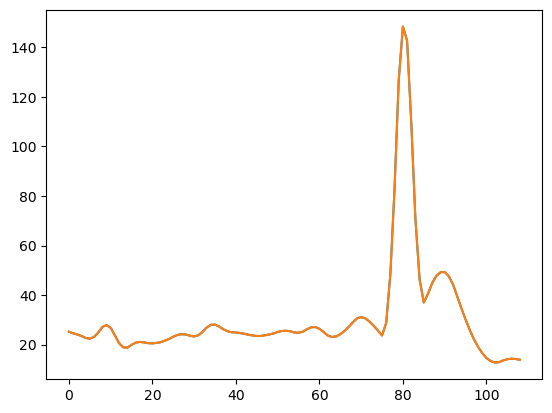

In [31]:
plt.plot(fashion['PE'])
plt.plot(arr)

In [7]:
result = adfuller(fashion['PE_Norm_Diff'].values)
print(result)

(-3.1693685857051936, 0.02182763223899447, 11, 97, {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}, -175.2314156943683)


## Interest rate
#### Need to do cyclical embedding

In [8]:
interest_rates = pd.read_csv("./datasets/Ben/interest_rates_dataset.csv")


for i in range(1,13):
    interest_rates[f'Interest Rate Norm Diff2 lag {i}'] = interest_rates['Interest Rate Norm Diff2'].shift(i) 

interest_rates = interest_rates.loc[interest_rates['year'] > 2013]
interest_rates = interest_rates.drop([10,11])
interest_rates = interest_rates.reset_index()
interest_rates = interest_rates.drop(columns=['index', 'Unnamed: 0', 'date'])
interest_rates.rename(columns={"month": "Month", "year": "Year"}, inplace=True)
interest_rates.drop([109],inplace=True)
interest_rates




,Month,Year,Interest Rate,Interest Rate Norm,Interest Rate Norm Diff,Interest Rate Norm Diff2,Interest Rate Norm Diff2 lag 1,Interest Rate Norm Diff2 lag 2,Interest Rate Norm Diff2 lag 3,Interest Rate Norm Diff2 lag 4,Interest Rate Norm Diff2 lag 5,Interest Rate Norm Diff2 lag 6,Interest Rate Norm Diff2 lag 7,Interest Rate Norm Diff2 lag 8,Interest Rate Norm Diff2 lag 9,Interest Rate Norm Diff2 lag 10,Interest Rate Norm Diff2 lag 11,Interest Rate Norm Diff2 lag 12
0,3,2014,2.7837,1.349903,-0.035595,0.073832,-0.068320,-0.254679,0.120106,0.283959,-0.346078,-0.117465,0.083936,-0.224365,0.225399,0.411298,0.007923,-0.344356
1,4,2014,2.7417,1.301677,-0.048226,-0.012631,0.073832,-0.068320,-0.254679,0.120106,0.283959,-0.346078,-0.117465,0.083936,-0.224365,0.225399,0.411298,0.007923
2,5,2014,2.6989,1.252533,-0.049145,-0.000919,-0.012631,0.073832,-0.068320,-0.254679,0.120106,0.283959,-0.346078,-0.117465,0.083936,-0.224365,0.225399,0.411298
3,6,2014,2.7842,1.350477,0.097945,0.147089,-0.000919,-0.012631,0.073832,-0.068320,-0.254679,0.120106,0.283959,-0.346078,-0.117465,0.083936,-0.224365,0.225399
4,7,2014,2.7343,1.293180,-0.057297,-0.155242,0.147089,-0.000919,-0.012631,0.073832,-0.068320,-0.254679,0.120106,0.283959,-0.346078,-0.117465,0.083936,-0.224365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,11,2022,3.4171,2.077196,-0.795154,-1.494315,-0.647605,1.137328,0.481570,-0.818118,0.464806,-0.252382,0.268572,-0.261109,-0.095993,0.539097,0.047881,-0.487197
105,12,2022,3.5015,2.174107,0.096911,0.892065,-1.494315,-0.647605,1.137328,0.481570,-0.818118,0.464806,-0.252382,0.268572,-0.261109,-0.095993,0.539097,0.047881
106,1,2023,3.5115,2.185590,0.011482,-0.085429,0.892065,-1.494315,-0.647605,1.137328,0.481570,-0.818118,0.464806,-0.252382,0.268572,-0.261109,-0.095993,0.539097
107,2,2023,3.5553,2.235882,0.050293,0.038810,-0.085429,0.892065,-1.494315,-0.647605,1.137328,0.481570,-0.818118,0.464806,-0.252382,0.268572,-0.261109,-0.095993


## Sayedur
## CPI datasets

#### Cyclical embedding
#### Added log norming instead of differencing

In [9]:
cpi = pd.read_csv("./datasets/Saye/cpi_dataset.csv")

mean = cpi['CPI'].mean()
std = cpi['CPI'].std()
cpi['CPI Norm'] = cpi['CPI'].apply(lambda x: (x-mean)/std)

mean = cpi['CPIH'].mean()
std = cpi['CPIH'].std()
cpi['CPIH Norm'] = cpi['CPIH'].apply(lambda x: (x-mean)/std)

cpi['CPI_Norm_Diff_2'] = cpi['CPI'].diff()
cpi['CPI_Norm_Diff_2'] = cpi['CPI_Norm_Diff_2'].diff()

cpi['CPIH_Norm_Diff_2'] = cpi['CPIH'].diff()
cpi['CPIH_Norm_Diff_2'] = cpi['CPIH_Norm_Diff_2'].diff()

for i in range(1,13):
    cpi[f'CPI_Norm_Diff_2_lag_{i}'] = cpi['CPI_Norm_Diff_2'].shift(i) 
    cpi[f'CPIH_Norm_Diff_2_lag_{i}'] = cpi['CPIH_Norm_Diff_2'].shift(i) 
cpi = cpi.loc[cpi['Year'] > 2013]
cpi = cpi.drop([12,13])

cpi = cpi.reset_index()
cpi = cpi.drop(columns=['index', 'Unnamed: 0', 'date'])


cpi


,CPI,CPIH,Year,Month,CPI_Diff_2,CPIH_Diff_2,CPI Norm,CPIH Norm,CPI_Norm_Diff_2,CPIH_Norm_Diff_2,...,CPI_Norm_Diff_2_lag_8,CPIH_Norm_Diff_2_lag_8,CPI_Norm_Diff_2_lag_9,CPIH_Norm_Diff_2_lag_9,CPI_Norm_Diff_2_lag_10,CPIH_Norm_Diff_2_lag_10,CPI_Norm_Diff_2_lag_11,CPIH_Norm_Diff_2_lag_11,CPI_Norm_Diff_2_lag_12,CPIH_Norm_Diff_2_lag_12
0,99.7,99.3,2014,3,-0.3,-0.2,-0.872311,-0.949918,-0.3,-0.2,...,2.000000e-01,0.2,-4.000000e-01,-0.4,0.000000e+00,0.0,-0.1,-0.1,-0.4,-0.2
1,100.1,99.6,2014,4,0.2,0.1,-0.819851,-0.908617,0.2,0.1,...,4.000000e-01,0.4,2.000000e-01,0.2,-4.000000e-01,-0.4,0.0,0.0,-0.1,-0.1
2,100.0,99.6,2014,5,-0.5,-0.3,-0.832966,-0.908617,-0.5,-0.3,...,-1.421085e-14,-0.1,4.000000e-01,0.4,2.000000e-01,0.2,-0.4,-0.4,0.0,0.0
3,100.2,99.8,2014,6,0.3,0.2,-0.806736,-0.881083,0.3,0.2,...,-4.000000e-01,-0.2,-1.421085e-14,-0.1,4.000000e-01,0.4,0.2,0.2,-0.4,-0.4
4,99.9,99.6,2014,7,-0.5,-0.4,-0.846081,-0.908617,-0.5,-0.4,...,1.000000e-01,-0.1,-4.000000e-01,-0.2,-1.421085e-14,-0.1,0.4,0.4,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,126.7,124.8,2022,11,-1.9,-1.5,2.668754,2.560647,-1.9,-1.5,...,4.000000e-01,0.3,1.100000e+00,0.9,-8.000000e-01,-0.7,-0.3,-0.1,-0.3,-0.3
105,127.2,125.3,2022,12,0.0,0.0,2.734330,2.629482,0.0,0.0,...,1.600000e+00,1.4,4.000000e-01,0.3,1.100000e+00,0.9,-0.8,-0.7,-0.3,-0.1
106,126.4,124.8,2023,1,-1.3,-1.0,2.629409,2.560647,-1.3,-1.0,...,-2.100000e+00,-1.8,1.600000e+00,1.4,4.000000e-01,0.3,1.1,0.9,-0.8,-0.7
107,127.9,126.0,2023,2,2.3,1.7,2.826135,2.725850,2.3,1.7,...,2.000000e-01,0.1,-2.100000e+00,-1.8,1.600000e+00,1.4,0.4,0.3,1.1,0.9


In [10]:
result = adfuller(cpi['CPI_Norm_Diff_2'].values)
print(result)

(-4.181019520962691, 0.0007093780289770365, 11, 97, {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}, 106.5127111907749)


## Adam

## Productivity


In [11]:
productivity = pd.read_csv("./datasets/Adam/productivity.csv")
productivity.drop([0], inplace=True)
productivity.drop(columns=['Month_sin', 'Month_cos', 'Difference'], inplace=True)

mean = productivity['Productivity'].mean()
std = productivity['Productivity'].std()
productivity['Productivity Norm'] = productivity['Productivity'].apply(lambda x: (x-mean)/std)

productivity['Productivity_Norm_Diff'] = productivity['Productivity Norm'].diff()


for i in range(1,13):
    productivity[f'Productivity_Norm_Diff_lag_{i}'] = productivity['Productivity_Norm_Diff'].shift(i)  

productivity = productivity.loc[productivity['Year'] > 2013]
productivity = productivity.drop([12,13])
productivity = productivity.reset_index()
productivity = productivity.drop(columns=['index'])
productivity


,Year,Month,Productivity,Productivity Norm,Productivity_Norm_Diff,Productivity_Norm_Diff_lag_1,Productivity_Norm_Diff_lag_2,Productivity_Norm_Diff_lag_3,Productivity_Norm_Diff_lag_4,Productivity_Norm_Diff_lag_5,Productivity_Norm_Diff_lag_6,Productivity_Norm_Diff_lag_7,Productivity_Norm_Diff_lag_8,Productivity_Norm_Diff_lag_9,Productivity_Norm_Diff_lag_10,Productivity_Norm_Diff_lag_11,Productivity_Norm_Diff_lag_12
0,2014,3,95.700000,-1.363328,0.000000,0.000000,0.000000,0.000000,0.000000,0.131530,0.000000,0.000000,-0.131530,0.000000,0.000000,0.087687,0.000000
1,2014,4,95.800000,-1.319485,0.043843,0.000000,0.000000,0.000000,0.000000,0.000000,0.131530,0.000000,0.000000,-0.131530,0.000000,0.000000,0.087687
2,2014,5,95.800000,-1.319485,0.000000,0.043843,0.000000,0.000000,0.000000,0.000000,0.000000,0.131530,0.000000,0.000000,-0.131530,0.000000,0.000000
3,2014,6,95.800000,-1.319485,0.000000,0.000000,0.043843,0.000000,0.000000,0.000000,0.000000,0.000000,0.131530,0.000000,0.000000,-0.131530,0.000000
4,2014,7,96.300000,-1.100268,0.219217,0.000000,0.000000,0.043843,0.000000,0.000000,0.000000,0.000000,0.000000,0.131530,0.000000,0.000000,-0.131530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2022,11,101.762537,1.294690,-0.168170,0.239431,0.000000,0.000000,0.043843,0.000000,0.000000,0.043843,0.000000,0.000000,-0.306903,0.000000,0.000000
105,2022,12,101.925252,1.366030,0.071340,-0.168170,0.239431,0.000000,0.000000,0.043843,0.000000,0.000000,0.043843,0.000000,0.000000,-0.306903,0.000000
106,2023,1,102.280209,1.521655,0.155625,0.071340,-0.168170,0.239431,0.000000,0.000000,0.043843,0.000000,0.000000,0.043843,0.000000,0.000000,-0.306903
107,2023,2,102.175215,1.475622,-0.046033,0.155625,0.071340,-0.168170,0.239431,0.000000,0.000000,0.043843,0.000000,0.000000,0.043843,0.000000,0.000000


#### It is stationary

In [12]:
result = adfuller(productivity['Productivity_Norm_Diff'].values)
print(result)

(-8.679187481222082, 4.332483087950456e-14, 5, 103, {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}, 68.05893687362362)


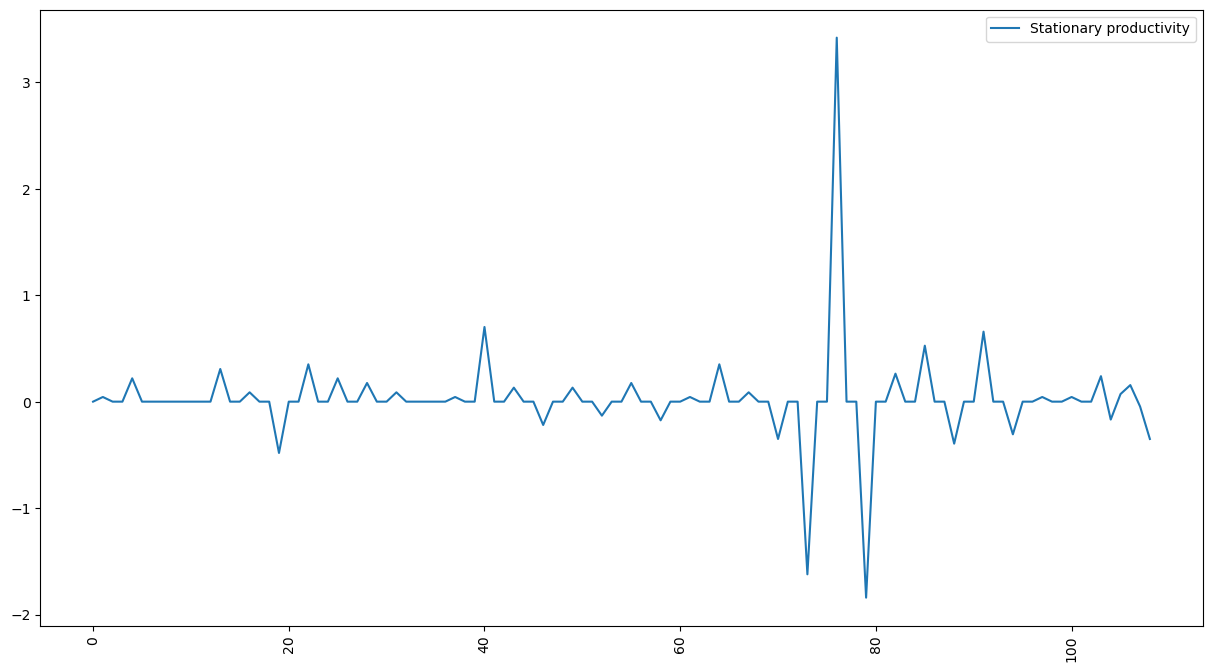

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
axes.plot(productivity['Productivity_Norm_Diff'], label='Stationary productivity')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

## Core inflation

#### Made stationary


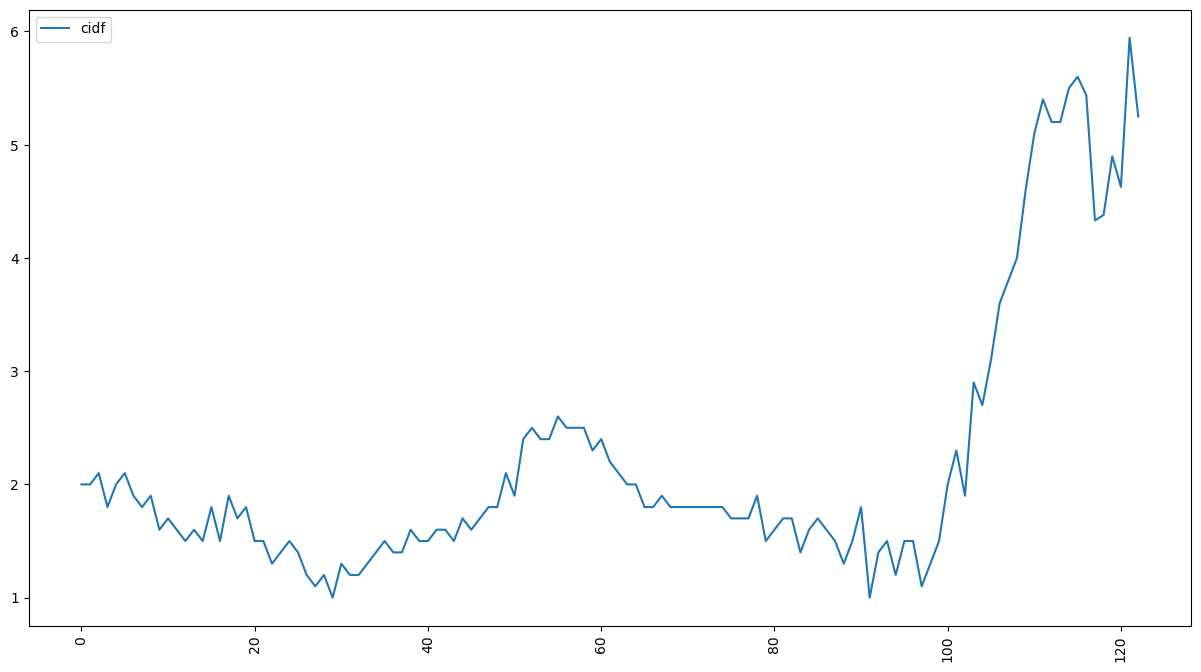

,Year,Month,Core
0,2013,1,2.000000
1,2013,2,2.000000
2,2013,3,2.100000
3,2013,4,1.800000
4,2013,5,2.000000
...,...,...,...
118,2022,11,4.379569
119,2022,12,4.896104
120,2023,1,4.628139
121,2023,2,5.945299


In [14]:
cidf = pd.read_csv("./datasets/Adam/core_inflation.csv")
cidf.drop(columns=['Month_sin', 'Month_cos'], inplace=True)
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
axes.plot(cidf['Core'], label='cidf')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()
cidf

In [15]:
result = adfuller(cidf['Core'].values)
print(result)


(0.315319430009166, 0.9780365183176093, 11, 111, {'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}, 44.09638031495783)


In [16]:
mean = cidf['Core'].mean()
std = cidf['Core'].std()
cidf['Core Norm'] = cidf['Core'].apply(lambda x: (x-mean)/std)

cidf['Core_Norm_Diff'] = cidf['Core Norm'].diff()
cidf['Core_Norm_Diff2'] = cidf['Core_Norm_Diff'].diff()

cidf.drop([0,1], inplace=True)
cidf


,Year,Month,Core,Core Norm,Core_Norm_Diff,Core_Norm_Diff2
2,2013,3,2.100000,-0.067706,0.085264,0.085264
3,2013,4,1.800000,-0.323499,-0.255793,-0.341057
4,2013,5,2.000000,-0.152971,0.170529,0.426322
5,2013,6,2.100000,-0.067706,0.085264,-0.085264
6,2013,7,1.900000,-0.238235,-0.170529,-0.255793
...,...,...,...,...,...,...
118,2022,11,4.379569,1.875953,0.041262,0.985370
119,2022,12,4.896104,2.316374,0.440420,0.399158
120,2023,1,4.628139,2.087895,-0.228478,-0.668899
121,2023,2,5.945299,3.210963,1.123068,1.351547


In [17]:
result = adfuller(cidf['Core_Norm_Diff2'].values)
print(result)


(-5.201842812952426, 8.716238058038694e-06, 9, 111, {'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}, 12.901555913231789)


In [18]:
for i in range(1,13):
    cidf[f'Core_Norm_Diff2_lag_{i}'] = cidf['Core_Norm_Diff2'].shift(i)  



cidf = cidf.loc[cidf['Year'] > 2013]
cidf = cidf.drop([12,13])
cidf = cidf.reset_index()
cidf = cidf.drop(columns=['index'])


cidf

,Year,Month,Core,Core Norm,Core_Norm_Diff,Core_Norm_Diff2,Core_Norm_Diff2_lag_1,Core_Norm_Diff2_lag_2,Core_Norm_Diff2_lag_3,Core_Norm_Diff2_lag_4,Core_Norm_Diff2_lag_5,Core_Norm_Diff2_lag_6,Core_Norm_Diff2_lag_7,Core_Norm_Diff2_lag_8,Core_Norm_Diff2_lag_9,Core_Norm_Diff2_lag_10,Core_Norm_Diff2_lag_11,Core_Norm_Diff2_lag_12
0,2014,3,1.500000,-0.579293,-0.085264,-0.170529,0.170529,-2.220446e-16,-1.705287e-01,3.410575e-01,-3.410575e-01,1.705287e-01,0.085264,-0.255793,-0.085264,4.263219e-01,-3.410575e-01,8.526437e-02
1,2014,4,1.800000,-0.323499,0.255793,0.341057,-0.170529,1.705287e-01,-2.220446e-16,-1.705287e-01,3.410575e-01,-3.410575e-01,0.170529,0.085264,-0.255793,-8.526437e-02,4.263219e-01,-3.410575e-01
2,2014,5,1.500000,-0.579293,-0.255793,-0.511586,0.341057,-1.705287e-01,1.705287e-01,-2.220446e-16,-1.705287e-01,3.410575e-01,-0.341057,0.170529,0.085264,-2.557931e-01,-8.526437e-02,4.263219e-01
3,2014,6,1.900000,-0.238235,0.341057,0.596851,-0.511586,3.410575e-01,-1.705287e-01,1.705287e-01,-2.220446e-16,-1.705287e-01,0.341057,-0.341057,0.170529,8.526437e-02,-2.557931e-01,-8.526437e-02
4,2014,7,1.700000,-0.408764,-0.170529,-0.511586,0.596851,-5.115862e-01,3.410575e-01,-1.705287e-01,1.705287e-01,-2.220446e-16,-0.170529,0.341057,-0.341057,1.705287e-01,8.526437e-02,-2.557931e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2022,11,4.379569,1.875953,0.041262,0.985370,-0.806361,-2.230117e-01,-1.705287e-01,2.557931e-01,1.705287e-01,-4.263219e-01,-0.170529,-0.085264,0.341057,6.661338e-16,-2.557931e-01,8.526437e-02
105,2022,12,4.896104,2.316374,0.440420,0.399158,0.985370,-8.063606e-01,-2.230117e-01,-1.705287e-01,2.557931e-01,1.705287e-01,-0.426322,-0.170529,-0.085264,3.410575e-01,6.661338e-16,-2.557931e-01
106,2023,1,4.628139,2.087895,-0.228478,-0.668899,0.399158,9.853698e-01,-8.063606e-01,-2.230117e-01,-1.705287e-01,2.557931e-01,0.170529,-0.426322,-0.170529,-8.526437e-02,3.410575e-01,6.661338e-16
107,2023,2,5.945299,3.210963,1.123068,1.351547,-0.668899,3.991583e-01,9.853698e-01,-8.063606e-01,-2.230117e-01,-1.705287e-01,0.255793,0.170529,-0.426322,-1.705287e-01,-8.526437e-02,3.410575e-01


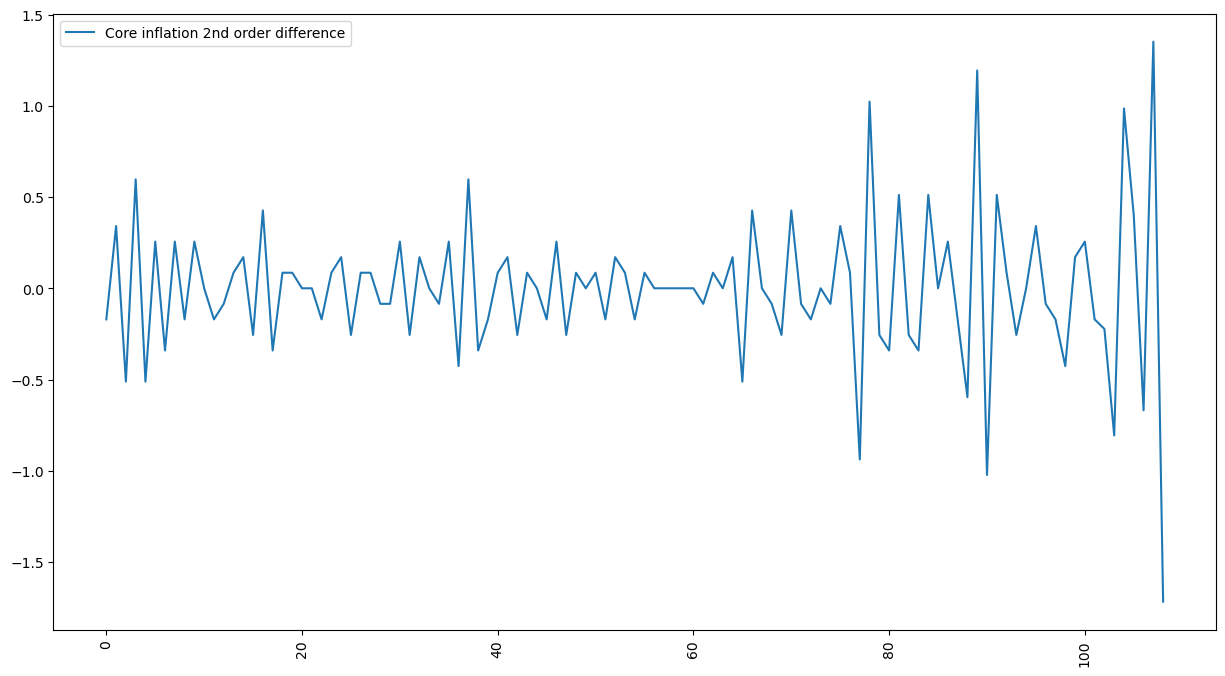

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
axes.plot(cidf['Core_Norm_Diff2'], label='Core inflation 2nd order difference')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()



## Adwaith




In [20]:
gdp = pd.read_csv("./datasets/Adwaith/gdp_dataset.csv")
gdp.drop(columns=['Unnamed: 0', 'Date'],inplace=True)
gdp


,GDP,Month,Year,GDP_Norm,GDP_Norm_Diff,GDP_Norm_Diff_lag_1,GDP_Norm_Diff_lag_2,GDP_Norm_Diff_lag_3,GDP_Norm_Diff_lag_4,GDP_Norm_Diff_lag_5,GDP_Norm_Diff_lag_6,GDP_Norm_Diff_lag_7,GDP_Norm_Diff_lag_8,GDP_Norm_Diff_lag_9,GDP_Norm_Diff_lag_10,GDP_Norm_Diff_lag_11,GDP_Norm_Diff_lag_12
0,502270.0,3,2014,-1.008855,0.052946,0.055519,0.058129,0.059270,0.051568,0.042391,0.034938,0.037806,0.042398,0.046127,0.044651,0.042311,0.039971
1,503659.0,4,2014,-0.958231,0.050624,0.052946,0.055519,0.058129,0.059270,0.051568,0.042391,0.034938,0.037806,0.042398,0.046127,0.044651,0.042311
2,504985.4,5,2014,-0.909888,0.048343,0.050624,0.052946,0.055519,0.058129,0.059270,0.051568,0.042391,0.034938,0.037806,0.042398,0.046127,0.044651
3,506253.0,6,2014,-0.863688,0.046200,0.048343,0.050624,0.052946,0.055519,0.058129,0.059270,0.051568,0.042391,0.034938,0.037806,0.042398,0.046127
4,507485.0,7,2014,-0.818786,0.044902,0.046200,0.048343,0.050624,0.052946,0.055519,0.058129,0.059270,0.051568,0.042391,0.034938,0.037806,0.042398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,558005.0,11,2022,1.022502,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247,0.015887,0.025965,0.056664
105,558005.0,12,2022,1.022502,0.000000,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247,0.015887,0.025965
106,558005.0,1,2023,1.022502,0.000000,0.000000,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247,0.015887
107,558005.0,2,2023,1.022502,0.000000,0.000000,0.000000,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247


In [21]:
unemployment = pd.read_csv("./datasets/Adwaith/unemployment_dataset.csv")
unemployment.drop(columns=['Unnamed: 0', 'Date'],inplace=True)
unemployment

,Month,Year,Unemployment,Unemployment_Norm,Unemployment_Norm_Diff,Unemployment_Norm_Diff_lag_1,Unemployment_Norm_Diff_lag_2,Unemployment_Norm_Diff_lag_3,Unemployment_Norm_Diff_lag_4,Unemployment_Norm_Diff_lag_5,Unemployment_Norm_Diff_lag_6,Unemployment_Norm_Diff_lag_7,Unemployment_Norm_Diff_lag_8,Unemployment_Norm_Diff_lag_9,Unemployment_Norm_Diff_lag_10,Unemployment_Norm_Diff_lag_11,Unemployment_Norm_Diff_lag_12
0,3,2014,6.6,-0.057124,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000,0.000000,-0.041922,0.000000,0.000000
1,4,2014,6.4,-0.140969,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000,0.000000,-0.041922,0.000000
2,5,2014,6.3,-0.182892,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000,0.000000,-0.041922
3,6,2014,6.1,-0.266737,-0.083845,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000,0.000000
4,7,2014,6.0,-0.308659,-0.041922,-0.083845,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,11,2022,3.7,-1.272875,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,0.041922,-0.041922,-0.083845,0.000000,-0.041922
105,12,2022,3.7,-1.272875,0.000000,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,0.041922,-0.041922,-0.083845,0.000000
106,1,2023,3.8,-1.230953,0.041922,0.000000,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,0.041922,-0.041922,-0.083845
107,2,2023,3.8,-1.230953,0.000000,0.041922,0.000000,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,0.041922,-0.041922


In [22]:

BIIIIIIIIGDATASET = pd.merge(unemployment, gdp, how='outer', on=['Month','Year'])
BIIIIIIIIGDATASET = pd.merge(BIIIIIIIIGDATASET, cidf, how='outer', on=['Month','Year'])
BIIIIIIIIGDATASET = pd.merge(BIIIIIIIIGDATASET, sentiment, how='outer', on=['Month','Year'])
BIIIIIIIIGDATASET = pd.merge(BIIIIIIIIGDATASET, interest_rates, how='outer', on=['Month','Year'])
BIIIIIIIIGDATASET = pd.merge(BIIIIIIIIGDATASET, cpi, how='outer', on=['Month','Year'])
BIIIIIIIIGDATASET = pd.merge(BIIIIIIIIGDATASET, productivity, how='outer', on=['Month','Year'])
BIIIIIIIIGDATASET = pd.merge(BIIIIIIIIGDATASET, fashion, how='outer', on=['Month','Year'])

BIIIIIIIIGDATASET['Month_sin'] = np.sin(2 * np.pi * BIIIIIIIIGDATASET['Month']/12.0)
BIIIIIIIIGDATASET['Month_cos'] = np.cos(2 * np.pi * BIIIIIIIIGDATASET['Month']/12.0)


BIIIIIIIIGDATASET.to_csv("./datasets/merged.csv")



In [23]:
# for i in range(8):
#     temp = BIIIIIIIIGDATASET[0:0]
#     os.makedirs(f"./datasets/cross-valid/fold{i}/", exist_ok=True)
#     for x in range(8):
#         fold_df = BIIIIIIIIGDATASET.loc[0:(x+1)*12-1]


#         if(x==i):
#             fold_df.to_csv(f"./datasets/cross-valid/fold{i}/test.csv")
#         else:
#             temp = pd.concat([temp,fold_df])
   
#     temp.to_csv(f"./datasets/cross-valid/fold{i}/train.csv")
for i in range(7):
    temp = BIIIIIIIIGDATASET[0:0]
    os.makedirs(f"./datasets/cross-valid/fold{i}/", exist_ok=True)
    
    fold_df = BIIIIIIIIGDATASET.loc[0:(i+1)*12-1]
    test_df = BIIIIIIIIGDATASET.loc[(i+1)*12:(i+2)*12-1]



    test_df.to_csv(f"./datasets/cross-valid/fold{i}/validation.csv")
    fold_df.to_csv(f"./datasets/cross-valid/fold{i}/train.csv")

test_set = BIIIIIIIIGDATASET.loc[(8*12):(8+1)*12-1]
test_set.to_csv(f"./datasets/test.csv")
train_set = BIIIIIIIIGDATASET[:-12]
train_set.drop([96],inplace=True)
train_set.to_csv(f"./datasets/train.csv")

C:\Users\je1g19\AppData\Local\Temp\ipykernel_16424\3674587923.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop([96],inplace=True)


In [24]:
train_set

,Month,Year,Unemployment,Unemployment_Norm,Unemployment_Norm_Diff,Unemployment_Norm_Diff_lag_1,Unemployment_Norm_Diff_lag_2,Unemployment_Norm_Diff_lag_3,Unemployment_Norm_Diff_lag_4,Unemployment_Norm_Diff_lag_5,...,PE_Norm_Diff,PE_mean,PE_std,PE_original_value,Absolute PE_Norm,Absolute PE_Norm_Diff,PS_Norm,PS_Norm_Diff,Month_sin,Month_cos
0,3,2014,6.6,-0.057124,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,...,-0.049173,30.608108,22.370005,-0.192584,-0.329008,-0.020703,0.041933,0.000000,1.000000e+00,6.123234e-17
1,4,2014,6.4,-0.140969,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,...,-0.026822,30.608108,22.370005,-0.192584,-0.353852,-0.024843,0.041933,0.000000,8.660254e-01,-5.000000e-01
2,5,2014,6.3,-0.182892,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,...,-0.022351,30.608108,22.370005,-0.192584,-0.374555,-0.020703,0.041933,0.000000,5.000000e-01,-8.660254e-01
3,6,2014,6.1,-0.266737,-0.083845,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,...,-0.026822,30.608108,22.370005,-0.192584,-0.386976,-0.012422,0.041933,0.000000,1.224647e-16,-1.000000e+00
4,7,2014,6.0,-0.308659,-0.041922,-0.083845,-0.041922,-0.083845,-0.083845,-0.041922,...,-0.035762,30.608108,22.370005,-0.192584,-0.399398,-0.012422,-0.216652,-0.258585,-5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,10,2021,4.1,-1.105185,-0.041922,-0.041922,-0.041922,-0.083845,-0.041922,-0.083845,...,-0.075995,30.608108,22.370005,-0.192584,0.039503,-0.082812,1.334856,-0.517169,-8.660254e-01,5.000000e-01
92,11,2021,4.0,-1.147108,-0.041922,-0.041922,-0.041922,-0.041922,-0.083845,-0.041922,...,-0.147519,30.608108,22.370005,-0.192584,-0.146823,-0.186326,0.817686,-0.517169,-5.000000e-01,8.660254e-01
93,12,2021,4.0,-1.147108,0.000000,-0.041922,-0.041922,-0.041922,-0.041922,-0.083845,...,-0.214573,30.608108,22.370005,-0.192584,-0.333149,-0.186326,0.559102,-0.258585,-2.449294e-16,1.000000e+00
94,1,2022,3.8,-1.230953,-0.083845,0.000000,-0.041922,-0.041922,-0.041922,-0.041922,...,-0.214573,30.608108,22.370005,-0.192584,-0.519475,-0.186326,0.300517,-0.258585,5.000000e-01,8.660254e-01


## Plot a correllation heatmap of all the different variables

#### This one is hard to read so lets cut it down a bit

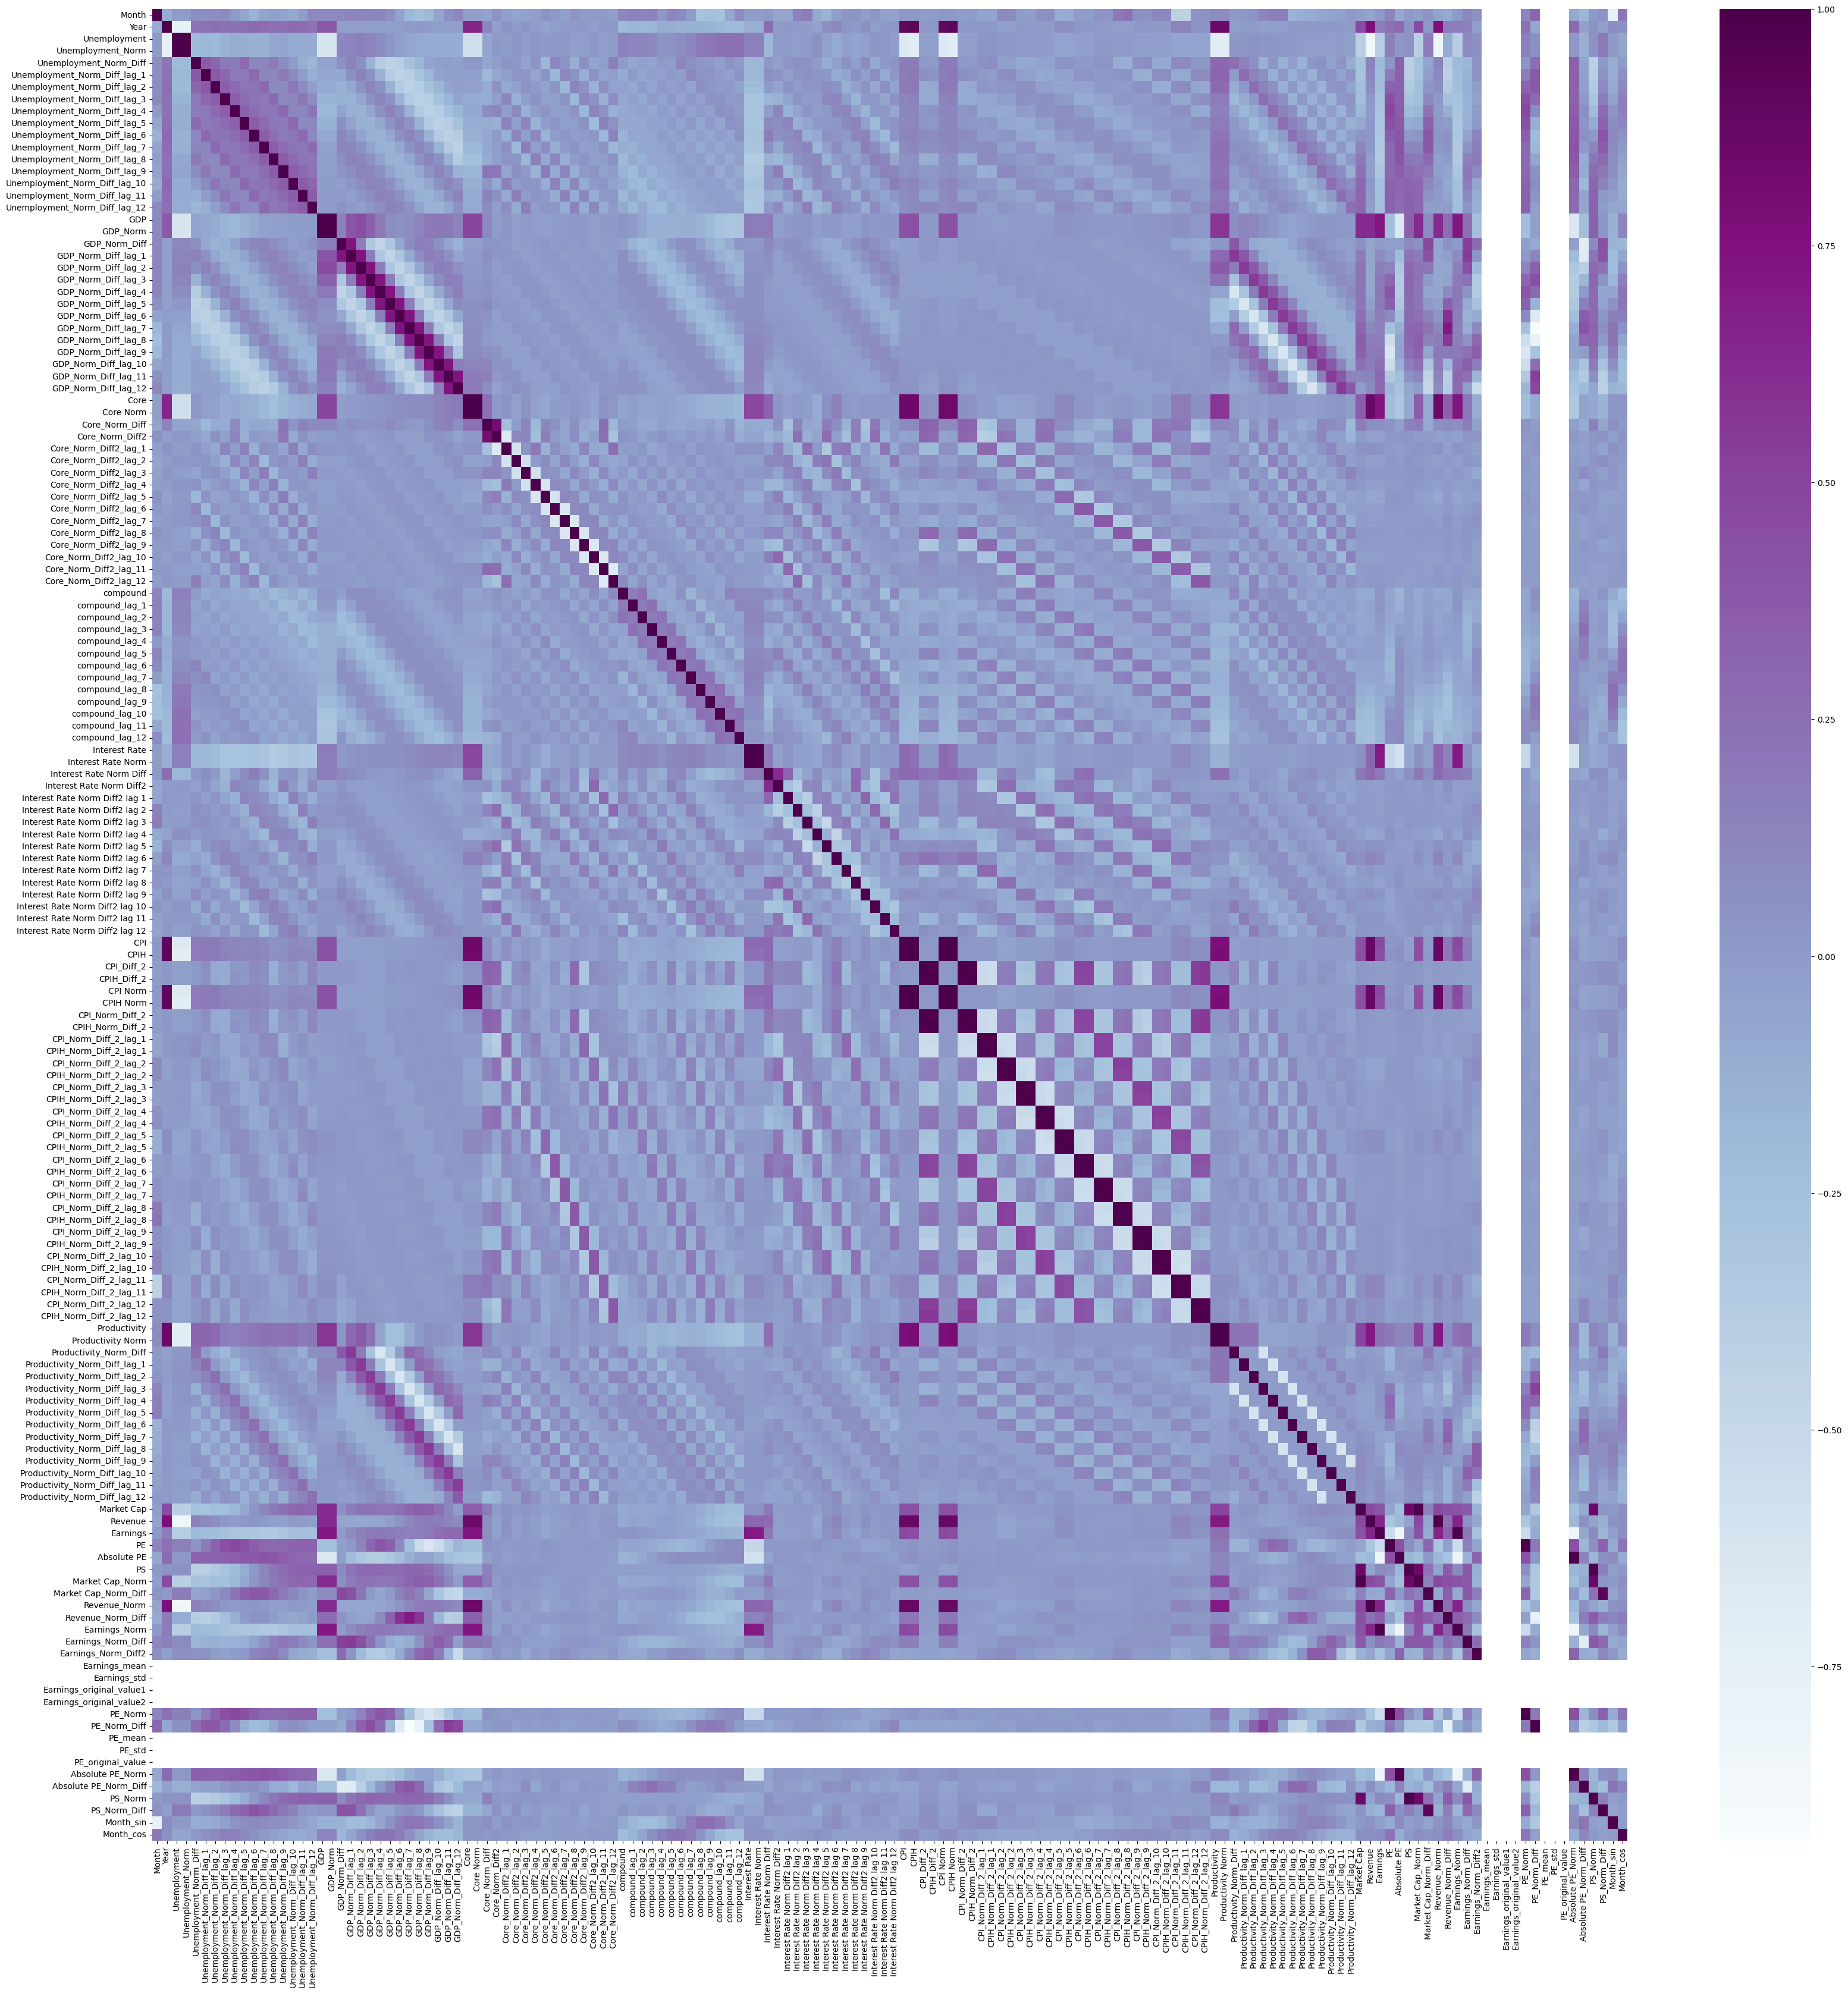

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(40, 40))

heatmap = sns.heatmap(BIIIIIIIIGDATASET.corr(),cmap='BuPu')
fig = heatmap.get_figure()
fig.savefig('heatmap.png')

In [26]:
test_df = pd.DataFrame()


test_df['Unemployment_Norm_Diff'] = BIIIIIIIIGDATASET['Unemployment_Norm_Diff']
for i in range(1,13):
    test_df[f'Unemployment_Norm_Diff_lag_{i}'] = BIIIIIIIIGDATASET[f'Unemployment_Norm_Diff_lag_{i}']
test_df['GDP_Norm_Diff'] = BIIIIIIIIGDATASET['GDP_Norm_Diff']
for i in range(1,13):
    test_df[f'GDP_Norm_Diff_lag_{i}'] = BIIIIIIIIGDATASET[f'GDP_Norm_Diff_lag_{i}']
test_df['Core_Norm_Diff2'] = BIIIIIIIIGDATASET['Core_Norm_Diff2']
for i in range(1,13):
    test_df[f'Core_Norm_Diff2_lag_{i}'] = BIIIIIIIIGDATASET[f'Core_Norm_Diff2_lag_{i}']
test_df['compound'] = BIIIIIIIIGDATASET['compound']
for i in range(1,13):
    test_df[f'compound_lag_{i}'] = BIIIIIIIIGDATASET[f'compound_lag_{i}']
test_df['Interest Rate Norm Diff2'] = BIIIIIIIIGDATASET['Interest Rate Norm Diff2']
for i in range(1,13):
    test_df[f'Interest Rate Norm Diff2 lag {i}'] = BIIIIIIIIGDATASET[f'Interest Rate Norm Diff2 lag {i}']
test_df['CPI_Norm_Diff_2'] = BIIIIIIIIGDATASET['CPI_Norm_Diff_2']
for i in range(1,13):
    test_df[f'CPI_Norm_Diff_2_lag_{i}'] = BIIIIIIIIGDATASET[f'CPI_Norm_Diff_2_lag_{i}']
test_df['CPIH_Norm_Diff_2'] = BIIIIIIIIGDATASET['CPIH_Norm_Diff_2']
for i in range(1,13):
    test_df[f'CPIH_Norm_Diff_2_lag_{i}'] = BIIIIIIIIGDATASET[f'CPIH_Norm_Diff_2_lag_{i}']
test_df['Productivity_Norm_Diff'] = BIIIIIIIIGDATASET['Productivity_Norm_Diff']
for i in range(1,13):
    test_df[f'Productivity_Norm_Diff_lag_{i}'] = BIIIIIIIIGDATASET[f'Productivity_Norm_Diff_lag_{i}']
test_df['PE_Norm_Diff'] = BIIIIIIIIGDATASET['PE_Norm_Diff']
test_df

C:\Users\je1g19\AppData\Local\Temp\ipykernel_12956\795691084.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[f'Productivity_Norm_Diff_lag_{i}'] = BIIIIIIIIGDATASET[f'Productivity_Norm_Diff_lag_{i}']
C:\Users\je1g19\AppData\Local\Temp\ipykernel_12956\795691084.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[f'Productivity_Norm_Diff_lag_{i}'] = BIIIIIIIIGDATASET[f'Productivity_Norm_Diff_lag_{i}']
C:\Users\je1g19\AppData\Local\Temp\ipykernel_12956\795691084.py:27: PerformanceWarning: DataFrame is highly fr

,Unemployment_Norm_Diff,Unemployment_Norm_Diff_lag_1,Unemployment_Norm_Diff_lag_2,Unemployment_Norm_Diff_lag_3,Unemployment_Norm_Diff_lag_4,Unemployment_Norm_Diff_lag_5,Unemployment_Norm_Diff_lag_6,Unemployment_Norm_Diff_lag_7,Unemployment_Norm_Diff_lag_8,Unemployment_Norm_Diff_lag_9,...,Productivity_Norm_Diff_lag_4,Productivity_Norm_Diff_lag_5,Productivity_Norm_Diff_lag_6,Productivity_Norm_Diff_lag_7,Productivity_Norm_Diff_lag_8,Productivity_Norm_Diff_lag_9,Productivity_Norm_Diff_lag_10,Productivity_Norm_Diff_lag_11,Productivity_Norm_Diff_lag_12,PE_Norm_Diff
0,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000,0.000000,...,0.000000,0.131530,0.000000,0.000000,-0.131530,0.000000,0.000000,0.087687,0.000000,-0.049173
1,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000,...,0.000000,0.000000,0.131530,0.000000,0.000000,-0.131530,0.000000,0.000000,0.087687,-0.026822
2,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,...,0.000000,0.000000,0.000000,0.131530,0.000000,0.000000,-0.131530,0.000000,0.000000,-0.022351
3,-0.083845,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,...,0.000000,0.000000,0.000000,0.000000,0.131530,0.000000,0.000000,-0.131530,0.000000,-0.026822
4,-0.041922,-0.083845,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.131530,0.000000,0.000000,-0.131530,-0.035762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,0.041922,-0.041922,...,0.043843,0.000000,0.000000,0.043843,0.000000,0.000000,-0.306903,0.000000,0.000000,0.031292
105,0.000000,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,0.041922,...,0.000000,0.043843,0.000000,0.000000,0.043843,0.000000,0.000000,-0.306903,0.000000,0.022351
106,0.041922,0.000000,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,...,0.000000,0.000000,0.043843,0.000000,0.000000,0.043843,0.000000,0.000000,-0.306903,0.008941
107,0.000000,0.041922,0.000000,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,...,0.239431,0.000000,0.000000,0.043843,0.000000,0.000000,0.043843,0.000000,0.000000,-0.004470


#### Removed superfluous variables, only looking at the chosen target variable (PE) with stationary variables and their lags
#### Still a bit hard to read

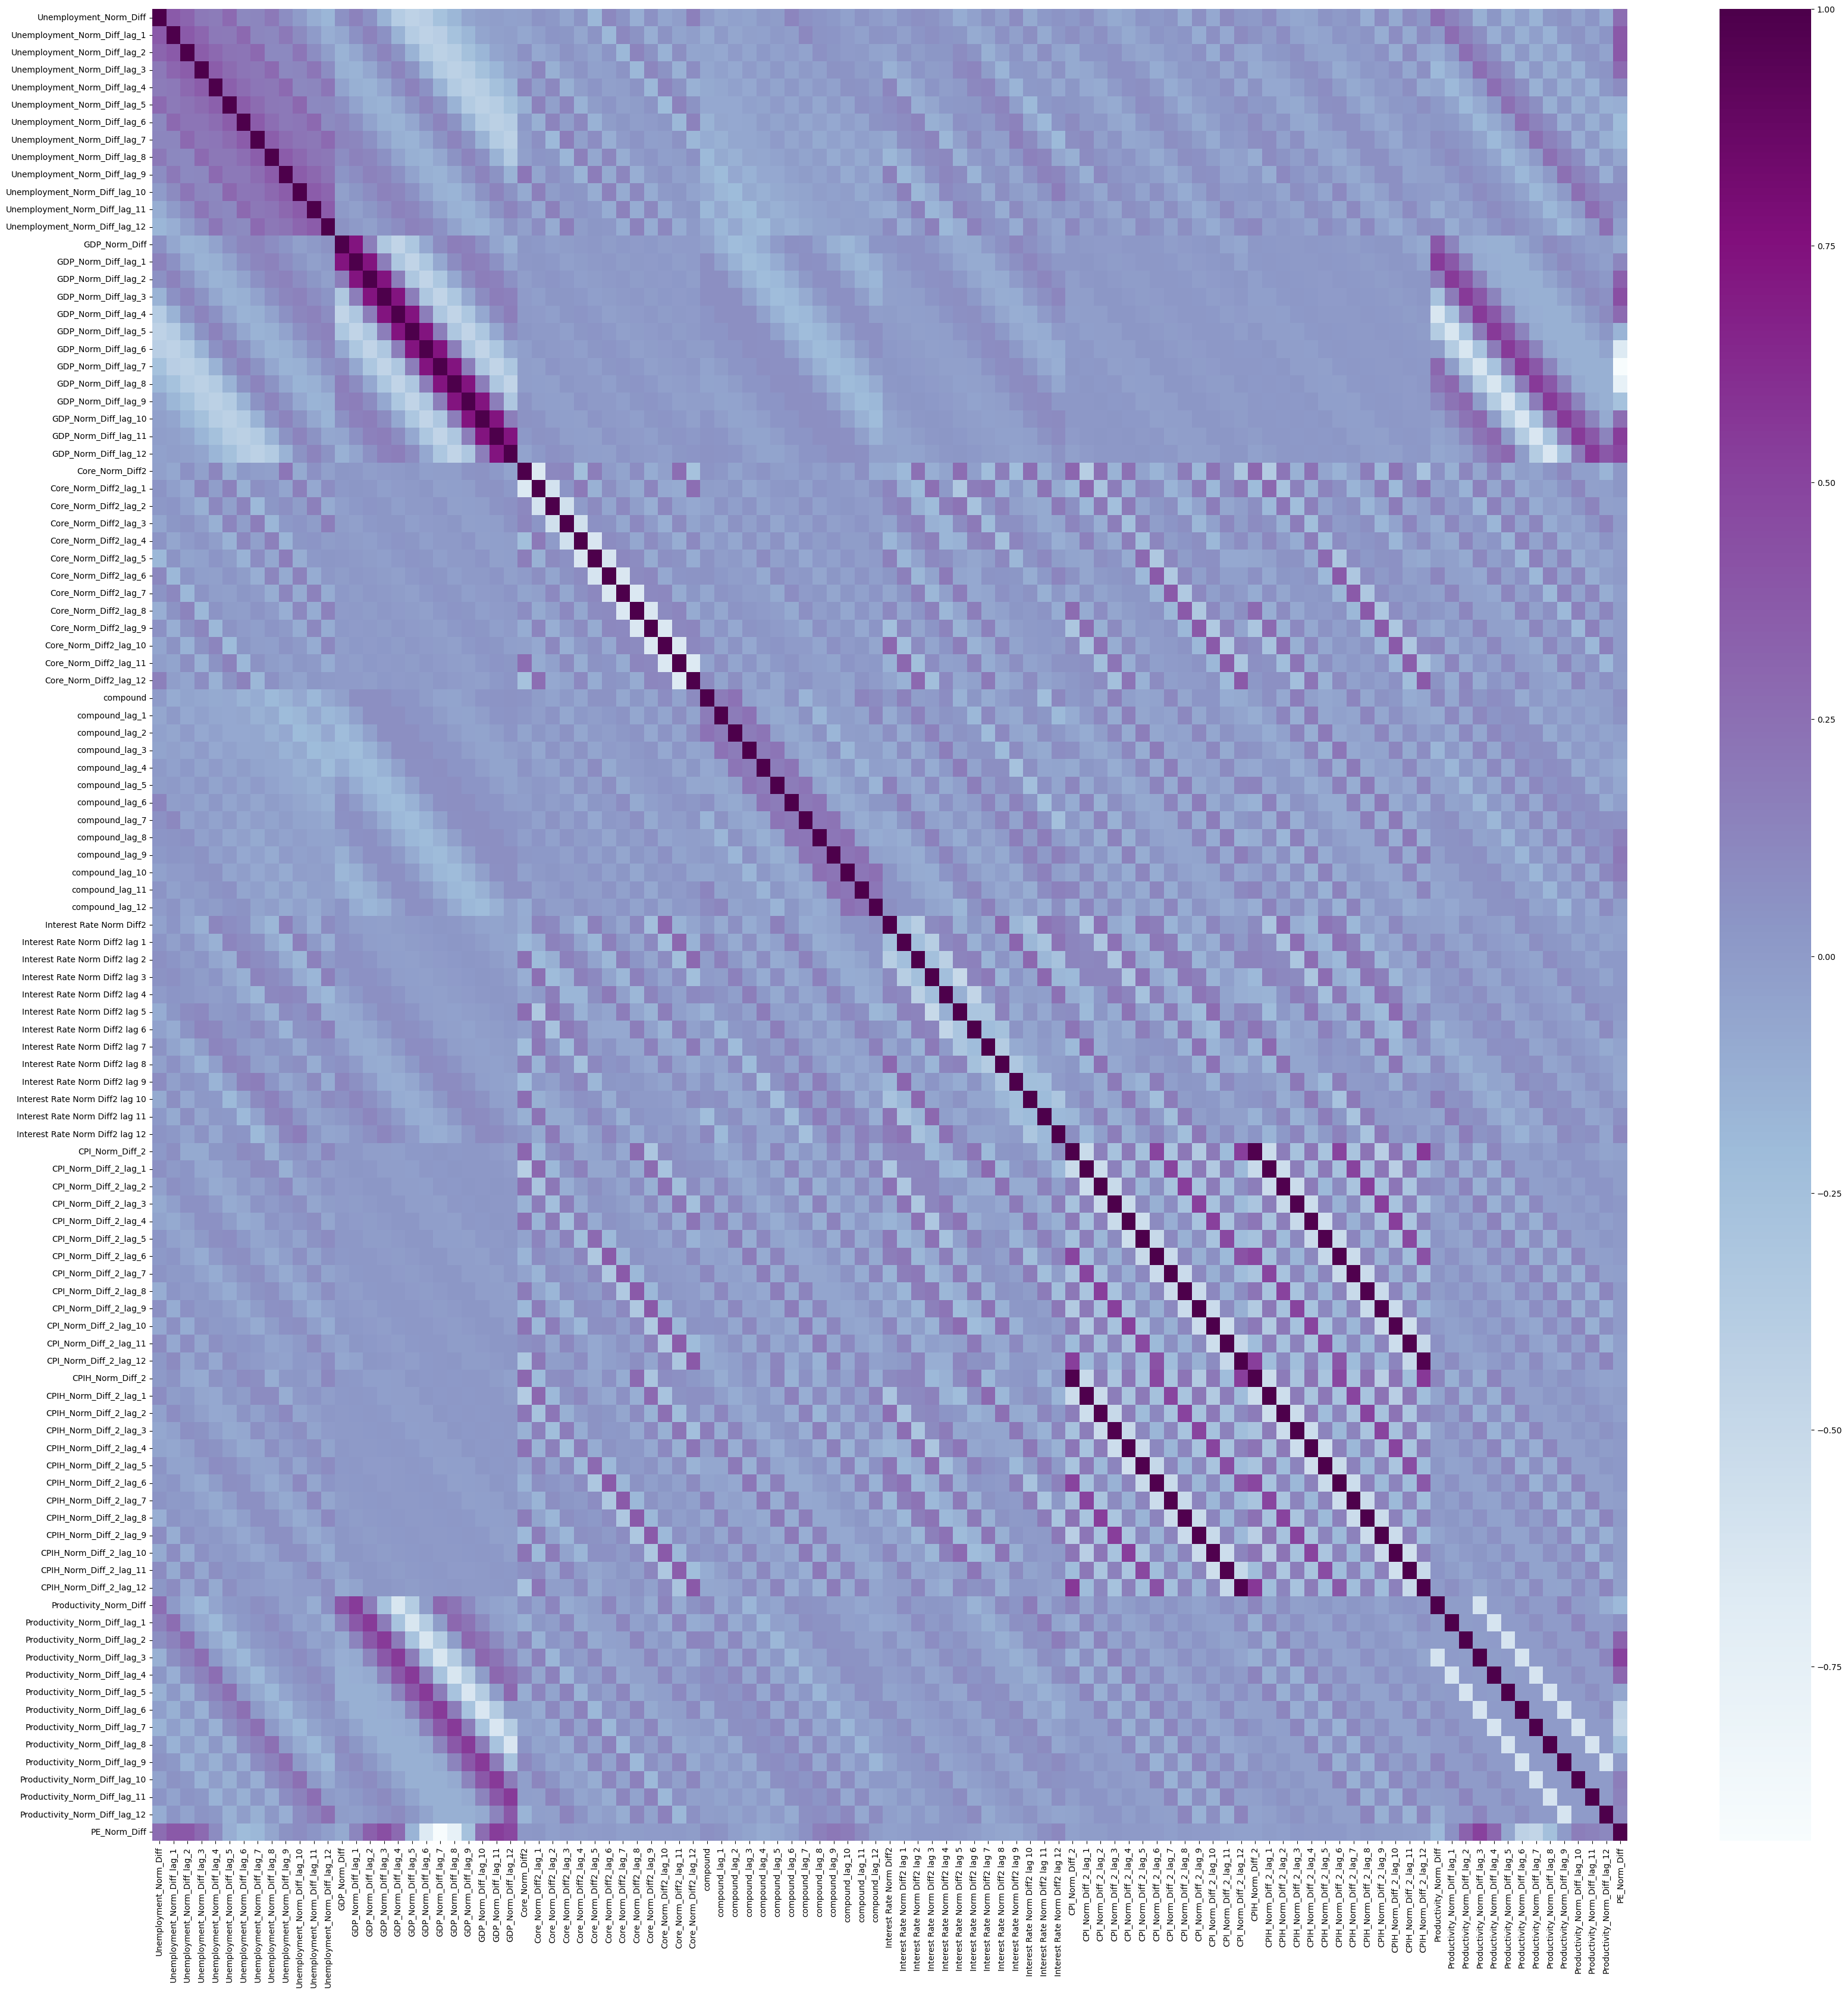

In [27]:
fig, axes = plt.subplots(figsize=(40, 40))
heatmap_reduced = sns.heatmap(test_df.corr(), cmap='BuPu')
fig = heatmap_reduced.get_figure()
fig.savefig('heatmap_reduced.png')

## Just the stationary variables compared with the target variable

Unemployment_Norm_Diff      0.262721
GDP_Norm_Diff              -0.092107
Core_Norm_Diff2             0.018079
compound                    0.067704
Interest Rate Norm Diff2   -0.040622
CPI_Norm_Diff_2            -0.039447
CPIH_Norm_Diff_2           -0.040057
Productivity_Norm_Diff     -0.190746
PE_Norm_Diff                1.000000
Name: PE_Norm_Diff, dtype: float64


,Unemployment_Norm_Diff,GDP_Norm_Diff,Core_Norm_Diff2,compound,Interest Rate Norm Diff2,CPI_Norm_Diff_2,CPIH_Norm_Diff_2,Productivity_Norm_Diff,PE_Norm_Diff
PE_Norm_Diff,0.262721,-0.092107,0.018079,0.067704,-0.040622,-0.039447,-0.040057,-0.190746,1.000000
Unemployment_Norm_Diff,1.000000,0.059347,-0.032159,-0.000337,-0.035796,0.013350,0.003642,0.259369,0.262721
Productivity_Norm_Diff,0.259369,0.383996,0.057961,0.115025,-0.029773,0.130019,0.118187,1.000000,0.190746
GDP_Norm_Diff,0.059347,1.000000,0.028761,-0.033995,0.034671,0.024445,0.022030,0.383996,0.092107
compound,-0.000337,-0.033995,0.044863,1.000000,0.021586,0.016780,-0.007007,0.115025,0.067704
Interest Rate Norm Diff2,-0.035796,0.034671,-0.099476,0.021586,1.000000,0.111520,0.093919,-0.029773,0.040622
CPIH_Norm_Diff_2,0.003642,0.022030,0.296553,-0.007007,0.093919,0.984634,1.000000,0.118187,0.040057
CPI_Norm_Diff_2,0.013350,0.024445,0.298620,0.016780,0.111520,1.000000,0.984634,0.130019,0.039447
Core_Norm_Diff2,-0.032159,0.028761,1.000000,0.044863,-0.099476,0.298620,0.296553,0.057961,0.018079


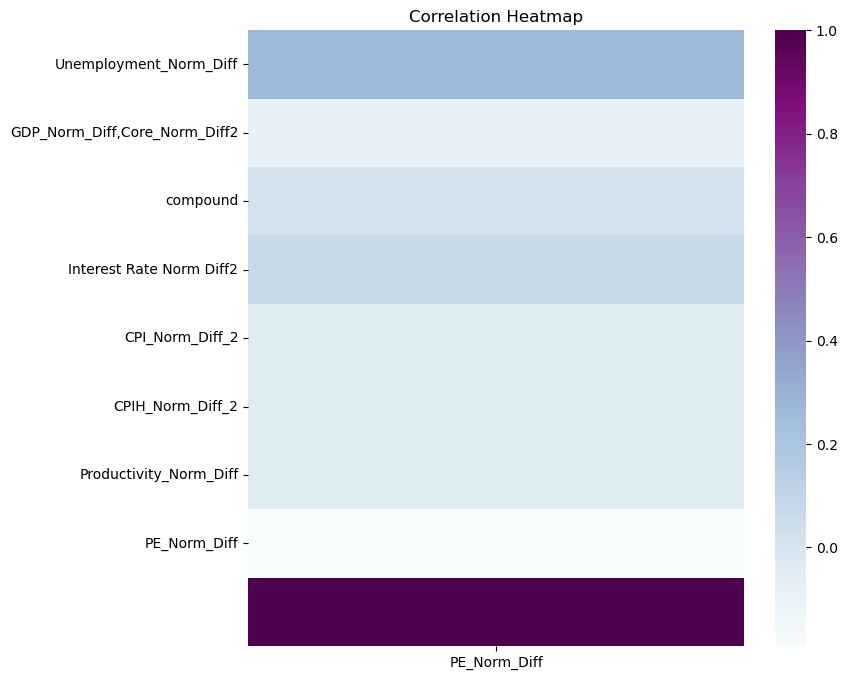

In [28]:
test_df = pd.DataFrame()


test_df['Unemployment_Norm_Diff'] = BIIIIIIIIGDATASET['Unemployment_Norm_Diff']
test_df['GDP_Norm_Diff'] = BIIIIIIIIGDATASET['GDP_Norm_Diff']
test_df['Core_Norm_Diff2'] = BIIIIIIIIGDATASET['Core_Norm_Diff2']
test_df['compound'] = BIIIIIIIIGDATASET['compound']
test_df['Interest Rate Norm Diff2'] = BIIIIIIIIGDATASET['Interest Rate Norm Diff2']
test_df['CPI_Norm_Diff_2'] = BIIIIIIIIGDATASET['CPI_Norm_Diff_2']
test_df['CPIH_Norm_Diff_2'] = BIIIIIIIIGDATASET['CPIH_Norm_Diff_2']
test_df['Productivity_Norm_Diff'] = BIIIIIIIIGDATASET['Productivity_Norm_Diff']
test_df['PE_Norm_Diff'] = BIIIIIIIIGDATASET['PE_Norm_Diff']

print(test_df.corr()['PE_Norm_Diff'])
column = np.array(test_df.corr()['PE_Norm_Diff'])
labels = ["Unemployment_Norm_Diff", "GDP_Norm_Diff,Core_Norm_Diff2", "compound", "Interest Rate Norm Diff2", "CPI_Norm_Diff_2", "CPIH_Norm_Diff_2", "Productivity_Norm_Diff", "PE_Norm_Diff"]

column = np.resize(column,(9,1))

fig, axes = plt.subplots(figsize=(8, 8))
heatmap_reduced_more = sns.heatmap(column, cmap='BuPu', yticklabels=labels, xticklabels=["PE_Norm_Diff"])
fig = heatmap_reduced_more.get_figure()
axes.set_title("Correlation Heatmap")
fig.savefig('heatmap_reduced_more.png')

corr = test_df.corr()
# corr.idxmax(axis=1)
corr['PE_Norm_Diff'] = np.abs(corr['PE_Norm_Diff'])
corr.nlargest(9, 'PE_Norm_Diff')

## Unemployment 

,Unemployment_Norm_Diff,Unemployment_Norm_Diff_lag_1,Unemployment_Norm_Diff_lag_2,Unemployment_Norm_Diff_lag_3,Unemployment_Norm_Diff_lag_4,Unemployment_Norm_Diff_lag_5,Unemployment_Norm_Diff_lag_6,Unemployment_Norm_Diff_lag_7,Unemployment_Norm_Diff_lag_8,Unemployment_Norm_Diff_lag_9,Unemployment_Norm_Diff_lag_10,Unemployment_Norm_Diff_lag_11,Unemployment_Norm_Diff_lag_12,PE_Norm_Diff
PE_Norm_Diff,0.262721,0.375322,0.387974,0.282013,0.092023,-0.121285,-0.216244,-0.183742,-0.069990,0.049447,0.083560,0.039558,-0.027247,1.000000
Unemployment_Norm_Diff_lag_2,0.305206,0.372194,1.000000,0.352413,0.283788,0.224386,0.216724,0.288746,0.101178,0.103936,0.210763,0.081845,-0.012695,0.387974


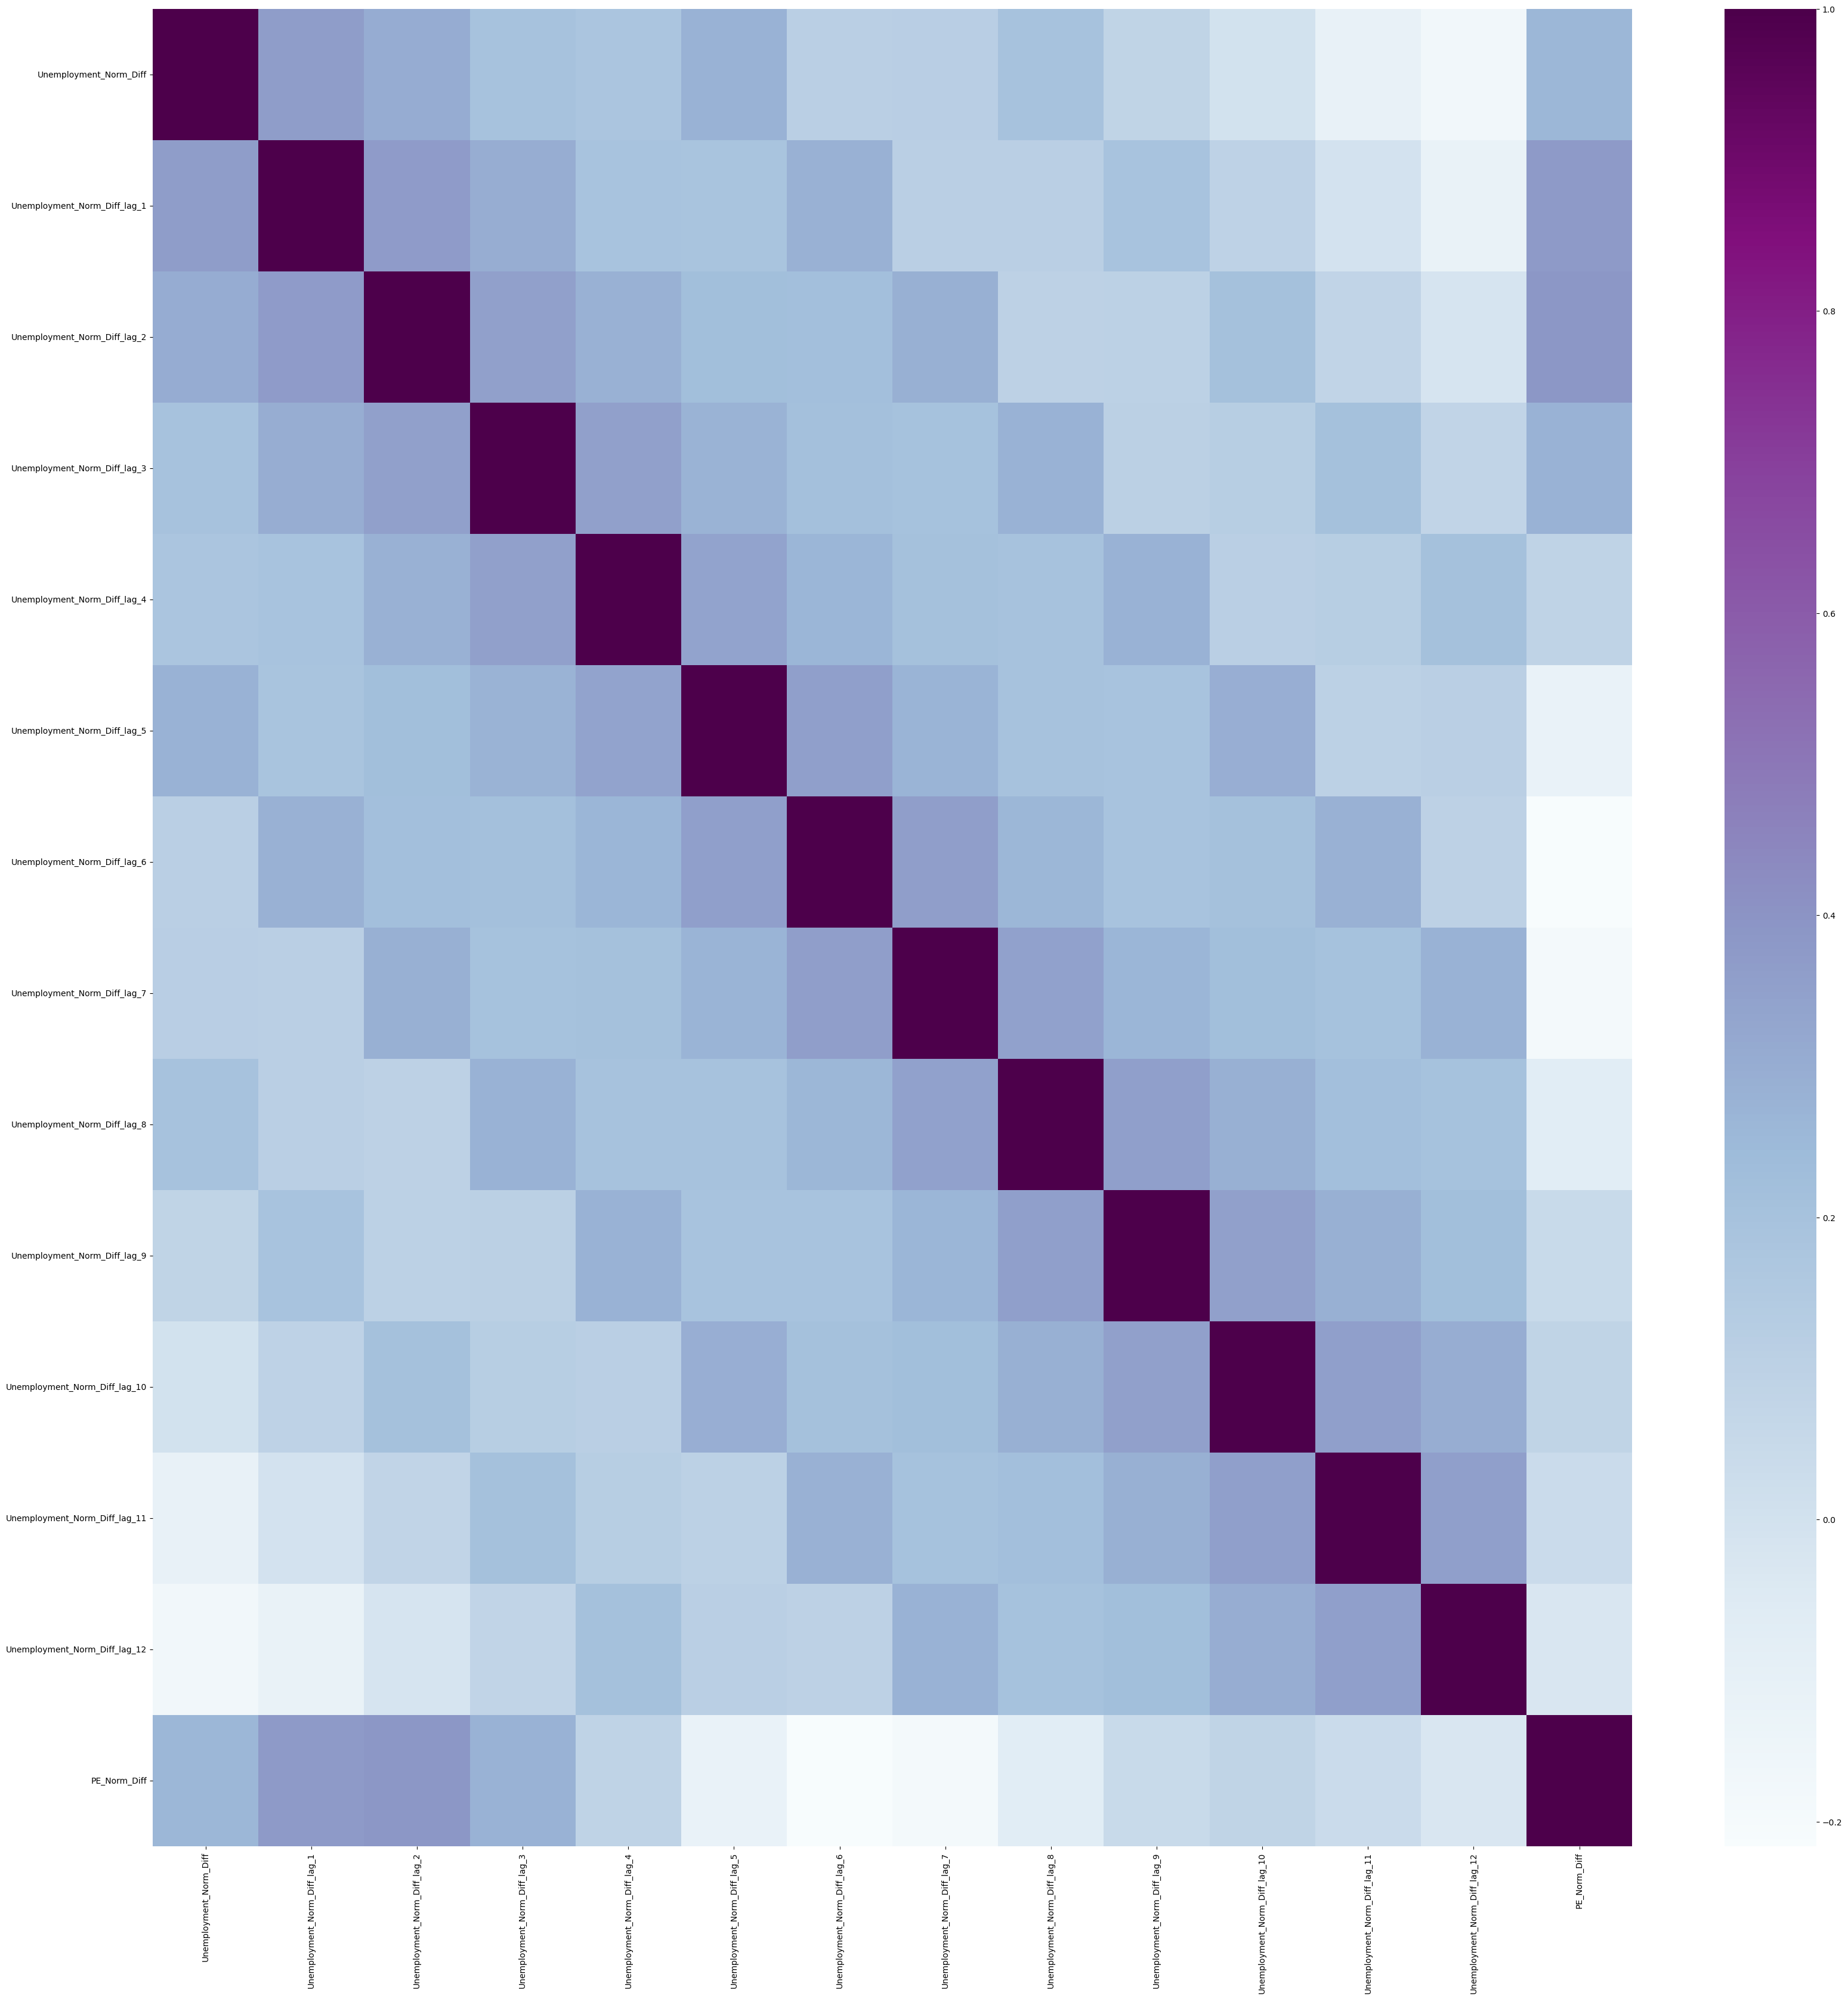

In [29]:
test_df = pd.DataFrame()


test_df['Unemployment_Norm_Diff'] = BIIIIIIIIGDATASET['Unemployment_Norm_Diff']
for i in range(1,13):
    test_df[f'Unemployment_Norm_Diff_lag_{i}'] = BIIIIIIIIGDATASET[f'Unemployment_Norm_Diff_lag_{i}']
test_df['PE_Norm_Diff'] = BIIIIIIIIGDATASET['PE_Norm_Diff']
fig, axes = plt.subplots(figsize=(40, 40))
heatmap_reduced_more = sns.heatmap(test_df.corr(), cmap='BuPu')

corr = test_df.corr()
# corr.idxmax(axis=1)
corr['PE_Norm_Diff'] = np.abs(corr['PE_Norm_Diff'])
corr.nlargest(2, 'PE_Norm_Diff')


## Core inflation

,Core_Norm_Diff2,Core_Norm_Diff2_lag_1,Core_Norm_Diff2_lag_2,Core_Norm_Diff2_lag_3,Core_Norm_Diff2_lag_4,Core_Norm_Diff2_lag_5,Core_Norm_Diff2_lag_6,Core_Norm_Diff2_lag_7,Core_Norm_Diff2_lag_8,Core_Norm_Diff2_lag_9,Core_Norm_Diff2_lag_10,Core_Norm_Diff2_lag_11,Core_Norm_Diff2_lag_12,PE_Norm_Diff
PE_Norm_Diff,0.018079,0.030025,-0.020307,-0.000548,-0.016139,0.001125,0.008425,-0.020224,-0.005529,0.001468,0.001822,0.009891,-0.005692,1.000000
Core_Norm_Diff2_lag_1,-0.654482,1.000000,-0.597871,0.038583,0.186379,-0.138713,0.077655,-0.031534,-0.088982,0.125898,-0.084304,-0.096066,0.258676,0.030025


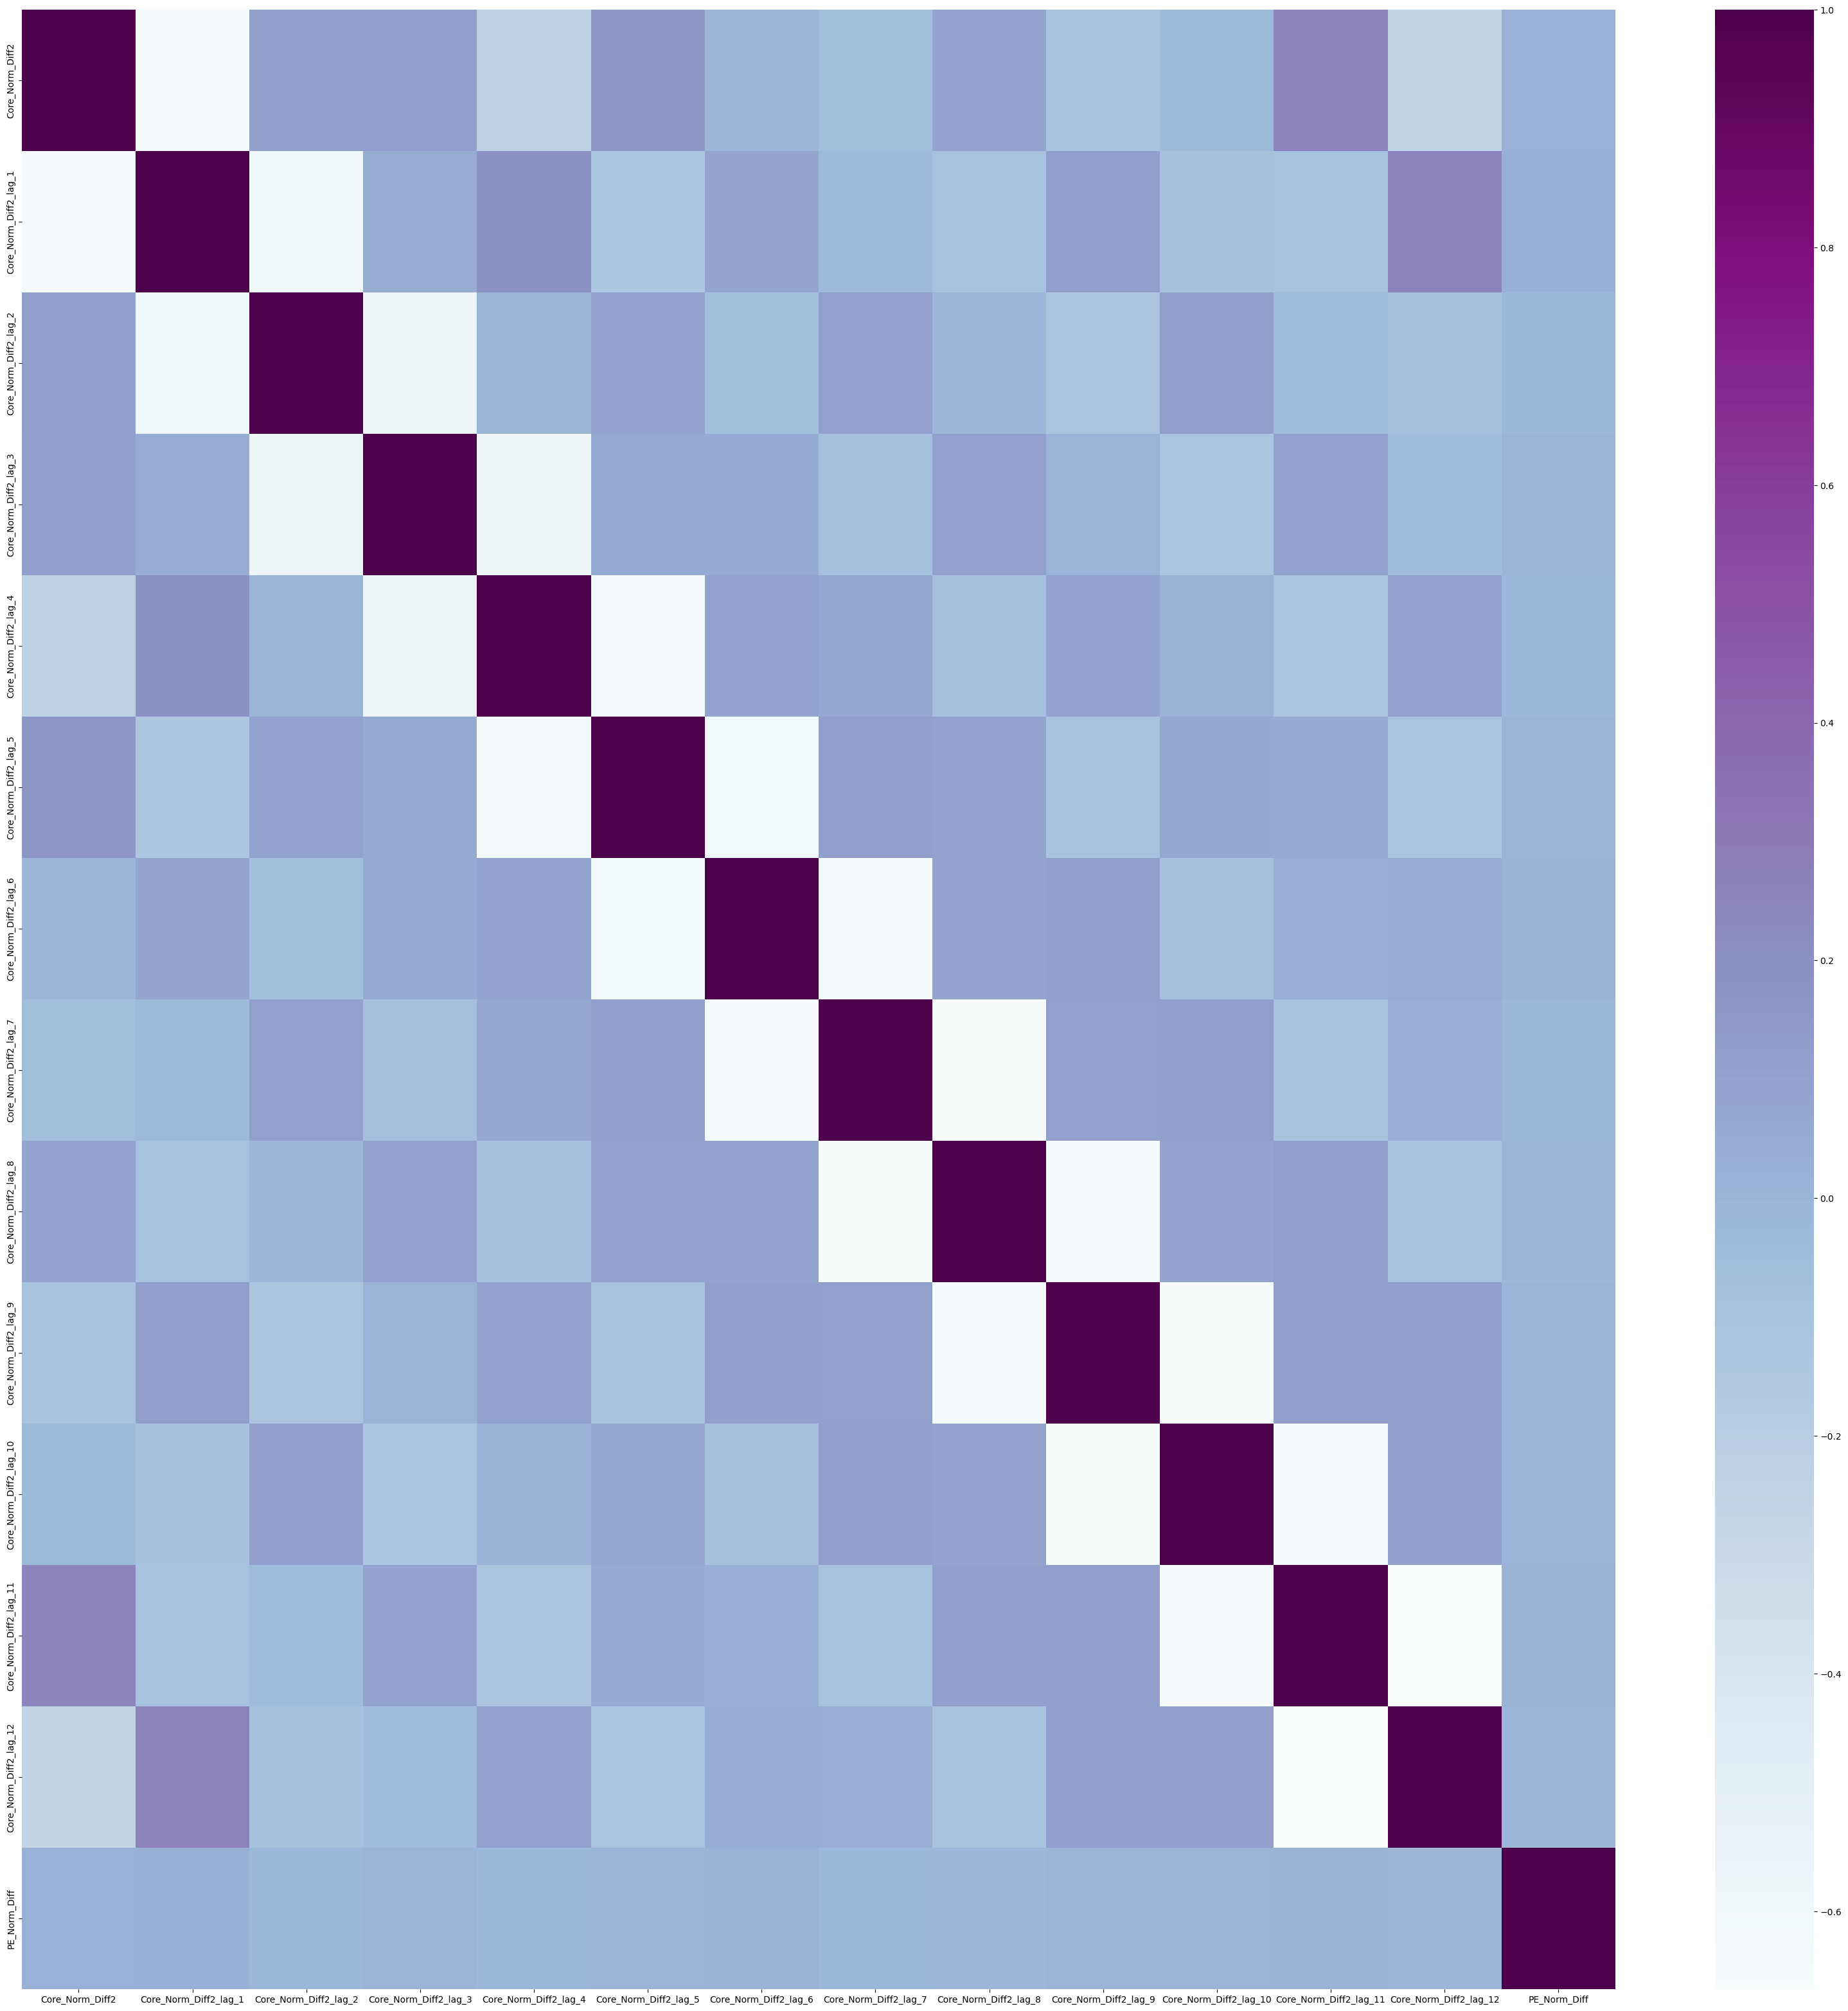

In [30]:
test_df = pd.DataFrame()


test_df['Core_Norm_Diff2'] = BIIIIIIIIGDATASET['Core_Norm_Diff2']
for i in range(1,13):
    test_df[f'Core_Norm_Diff2_lag_{i}'] = BIIIIIIIIGDATASET[f'Core_Norm_Diff2_lag_{i}']
test_df['PE_Norm_Diff'] = BIIIIIIIIGDATASET['PE_Norm_Diff']
fig, axes = plt.subplots(figsize=(40, 40))
heatmap_reduced_more = sns.heatmap(test_df.corr(), cmap='BuPu')
corr = test_df.corr()
# corr.idxmax(axis=1)
corr['PE_Norm_Diff'] = np.abs(corr['PE_Norm_Diff'])
corr.nlargest(2, 'PE_Norm_Diff')

## GDP

,Core_Norm_Diff2,GDP_Norm_Diff_lag_1,GDP_Norm_Diff_lag_2,GDP_Norm_Diff_lag_3,GDP_Norm_Diff_lag_4,GDP_Norm_Diff_lag_5,GDP_Norm_Diff_lag_6,GDP_Norm_Diff_lag_7,GDP_Norm_Diff_lag_8,GDP_Norm_Diff_lag_9,GDP_Norm_Diff_lag_10,GDP_Norm_Diff_lag_11,GDP_Norm_Diff_lag_12,PE_Norm_Diff
PE_Norm_Diff,0.018079,0.117574,0.342688,0.437630,0.276486,-0.162375,-0.663306,-0.933936,-0.765488,-0.266884,0.261004,0.532554,0.484766,1.000000
GDP_Norm_Diff_lag_7,-0.019002,-0.081022,-0.318695,-0.463679,-0.329358,0.161715,0.731002,1.000000,0.731004,0.161730,-0.329360,-0.463680,-0.318666,0.933936


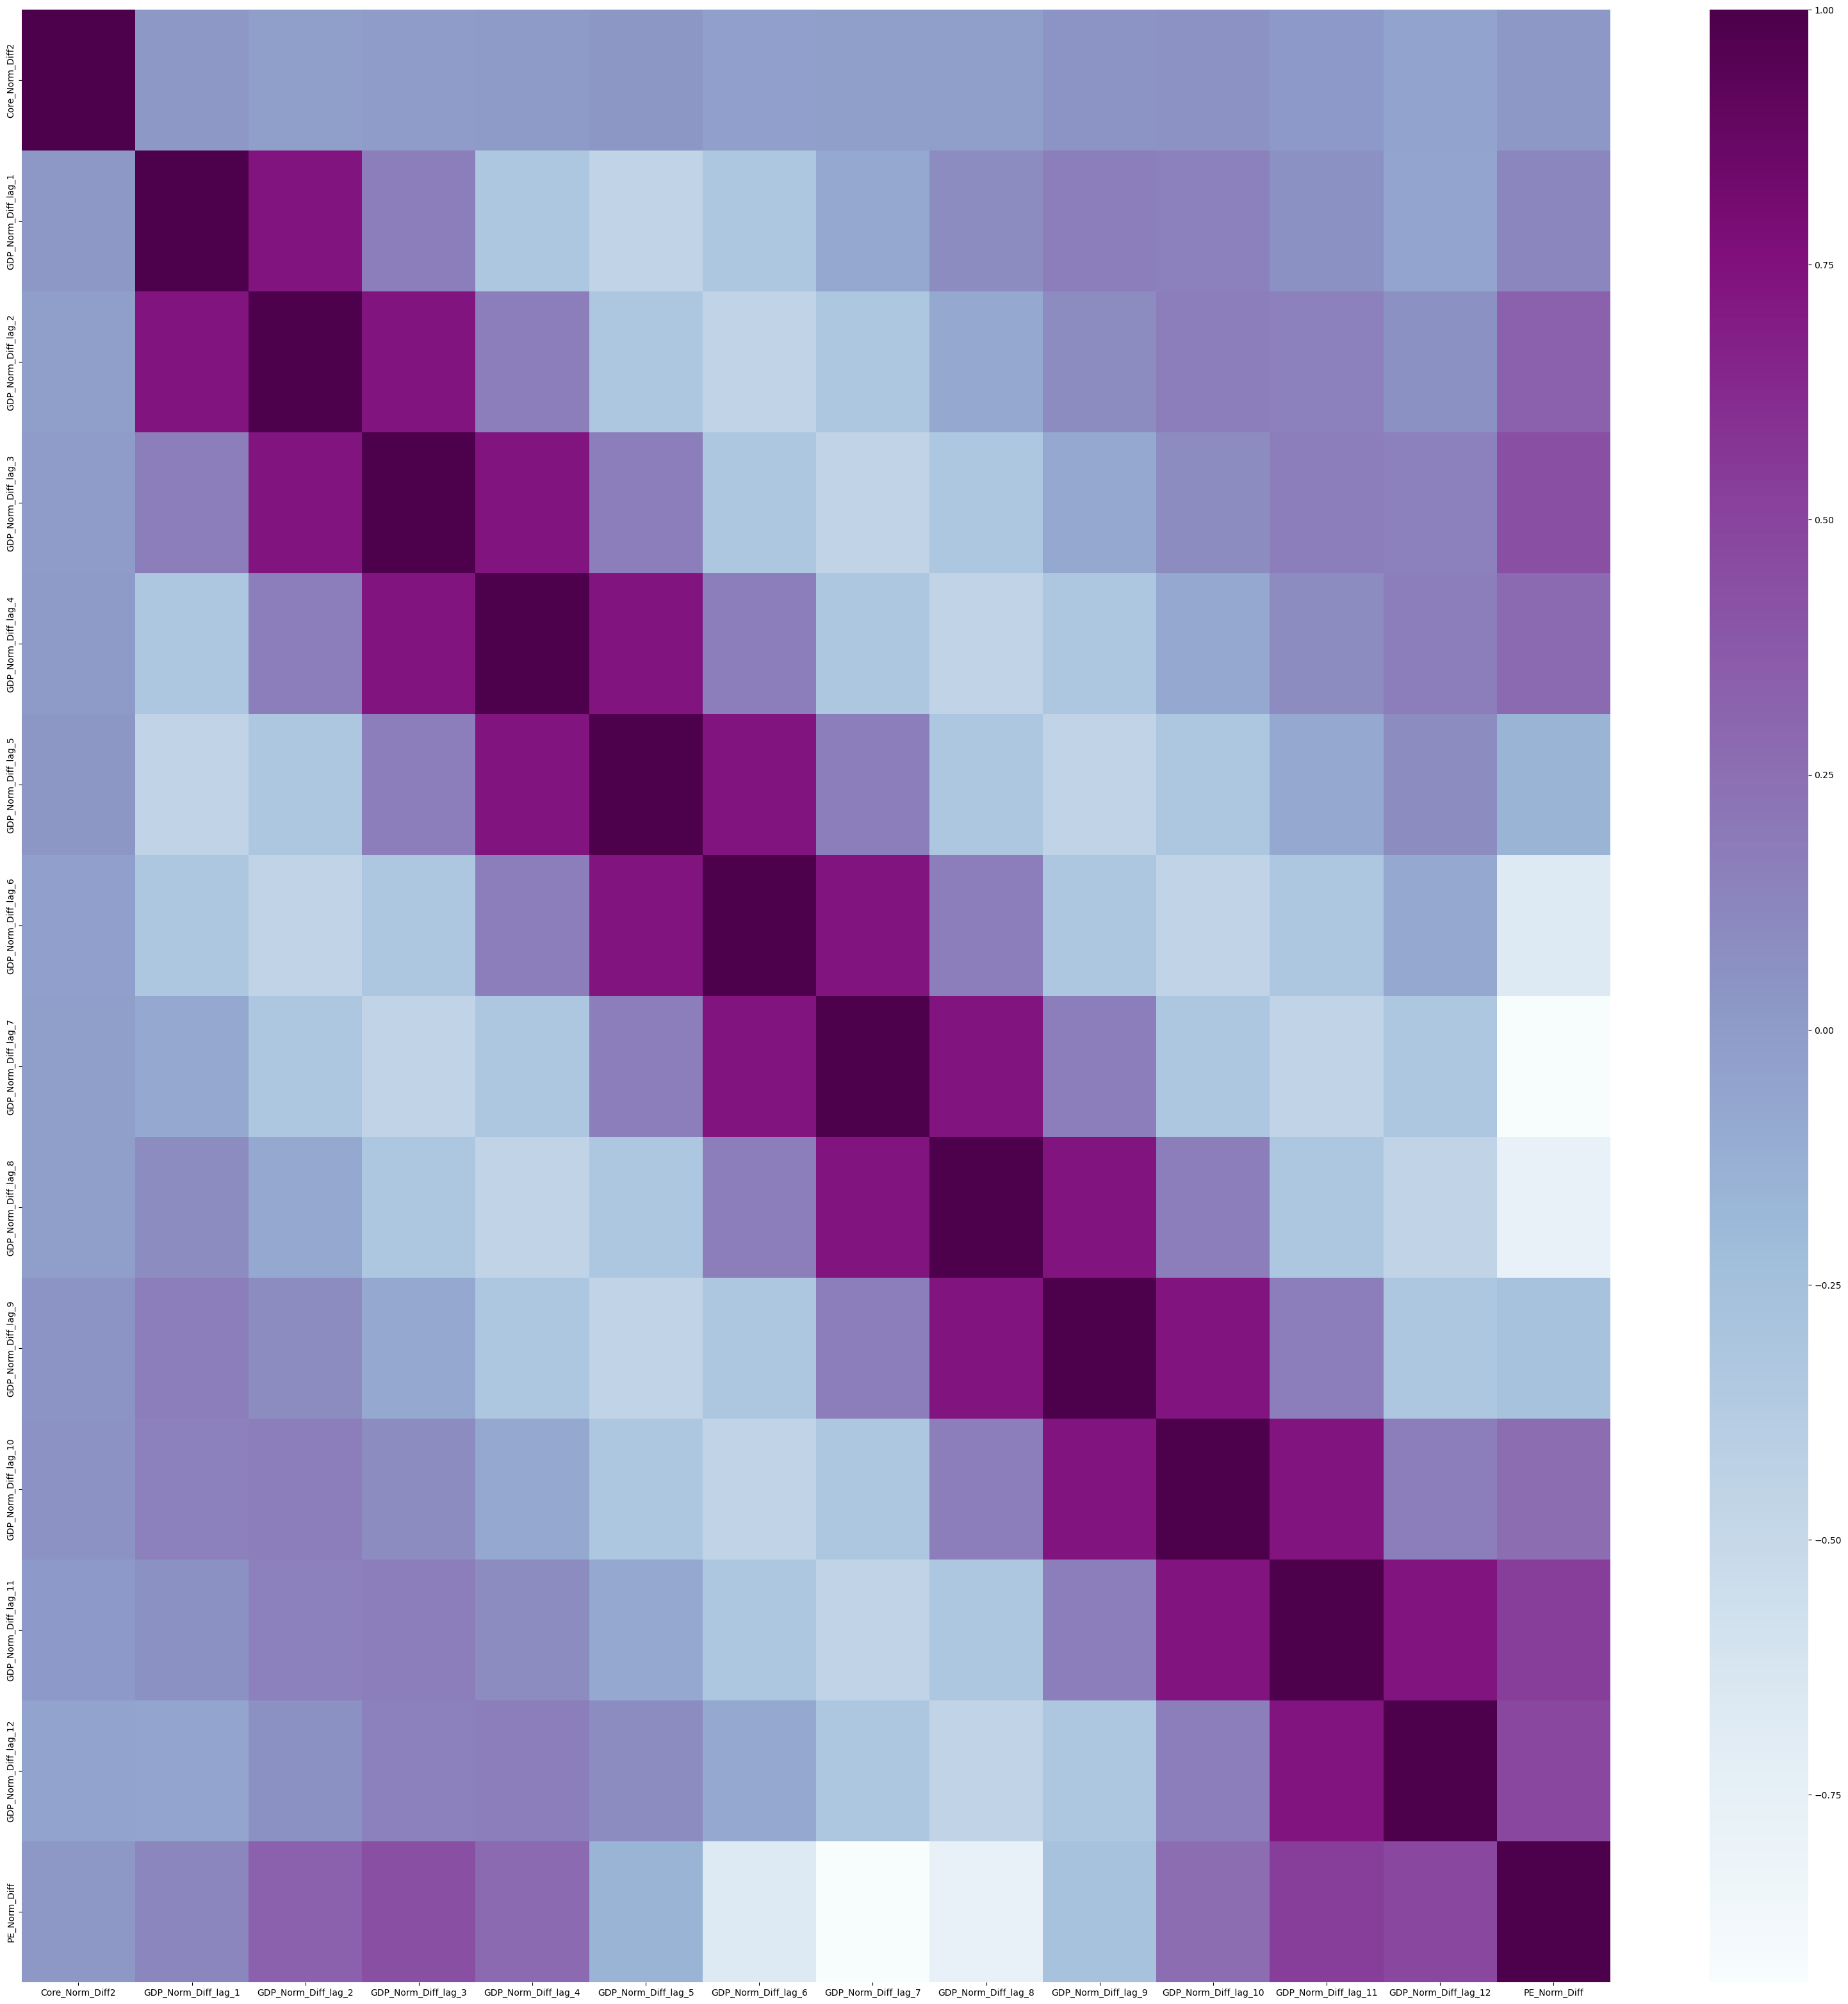

In [31]:
test_df = pd.DataFrame()


test_df['Core_Norm_Diff2'] = BIIIIIIIIGDATASET['Core_Norm_Diff2']
for i in range(1,13):
    test_df[f'GDP_Norm_Diff_lag_{i}'] = BIIIIIIIIGDATASET[f'GDP_Norm_Diff_lag_{i}']
test_df['PE_Norm_Diff'] = BIIIIIIIIGDATASET['PE_Norm_Diff']
fig, axes = plt.subplots(figsize=(40, 40))
heatmap_reduced_more = sns.heatmap(test_df.corr(), cmap='BuPu')
corr = test_df.corr()
# corr.idxmax(axis=1)
corr['PE_Norm_Diff'] = np.abs(corr['PE_Norm_Diff'])
corr.nlargest(2, 'PE_Norm_Diff')

## Compound sentiment

,compound,compound_lag_1,compound_lag_2,compound_lag_3,compound_lag_4,compound_lag_5,compound_lag_6,compound_lag_7,compound_lag_8,compound_lag_9,compound_lag_10,compound_lag_11,compound_lag_12,PE_Norm_Diff
PE_Norm_Diff,0.067704,0.050745,-0.021353,-0.056841,-0.098299,-0.077243,-0.027381,0.058974,0.154189,0.200453,0.181320,0.095914,-0.007658,1.000000
compound_lag_9,0.007710,-0.020690,-0.165790,0.056837,-0.057105,-0.127043,-0.056967,0.223530,0.208998,1.000000,0.214968,0.245942,-0.036532,0.200453


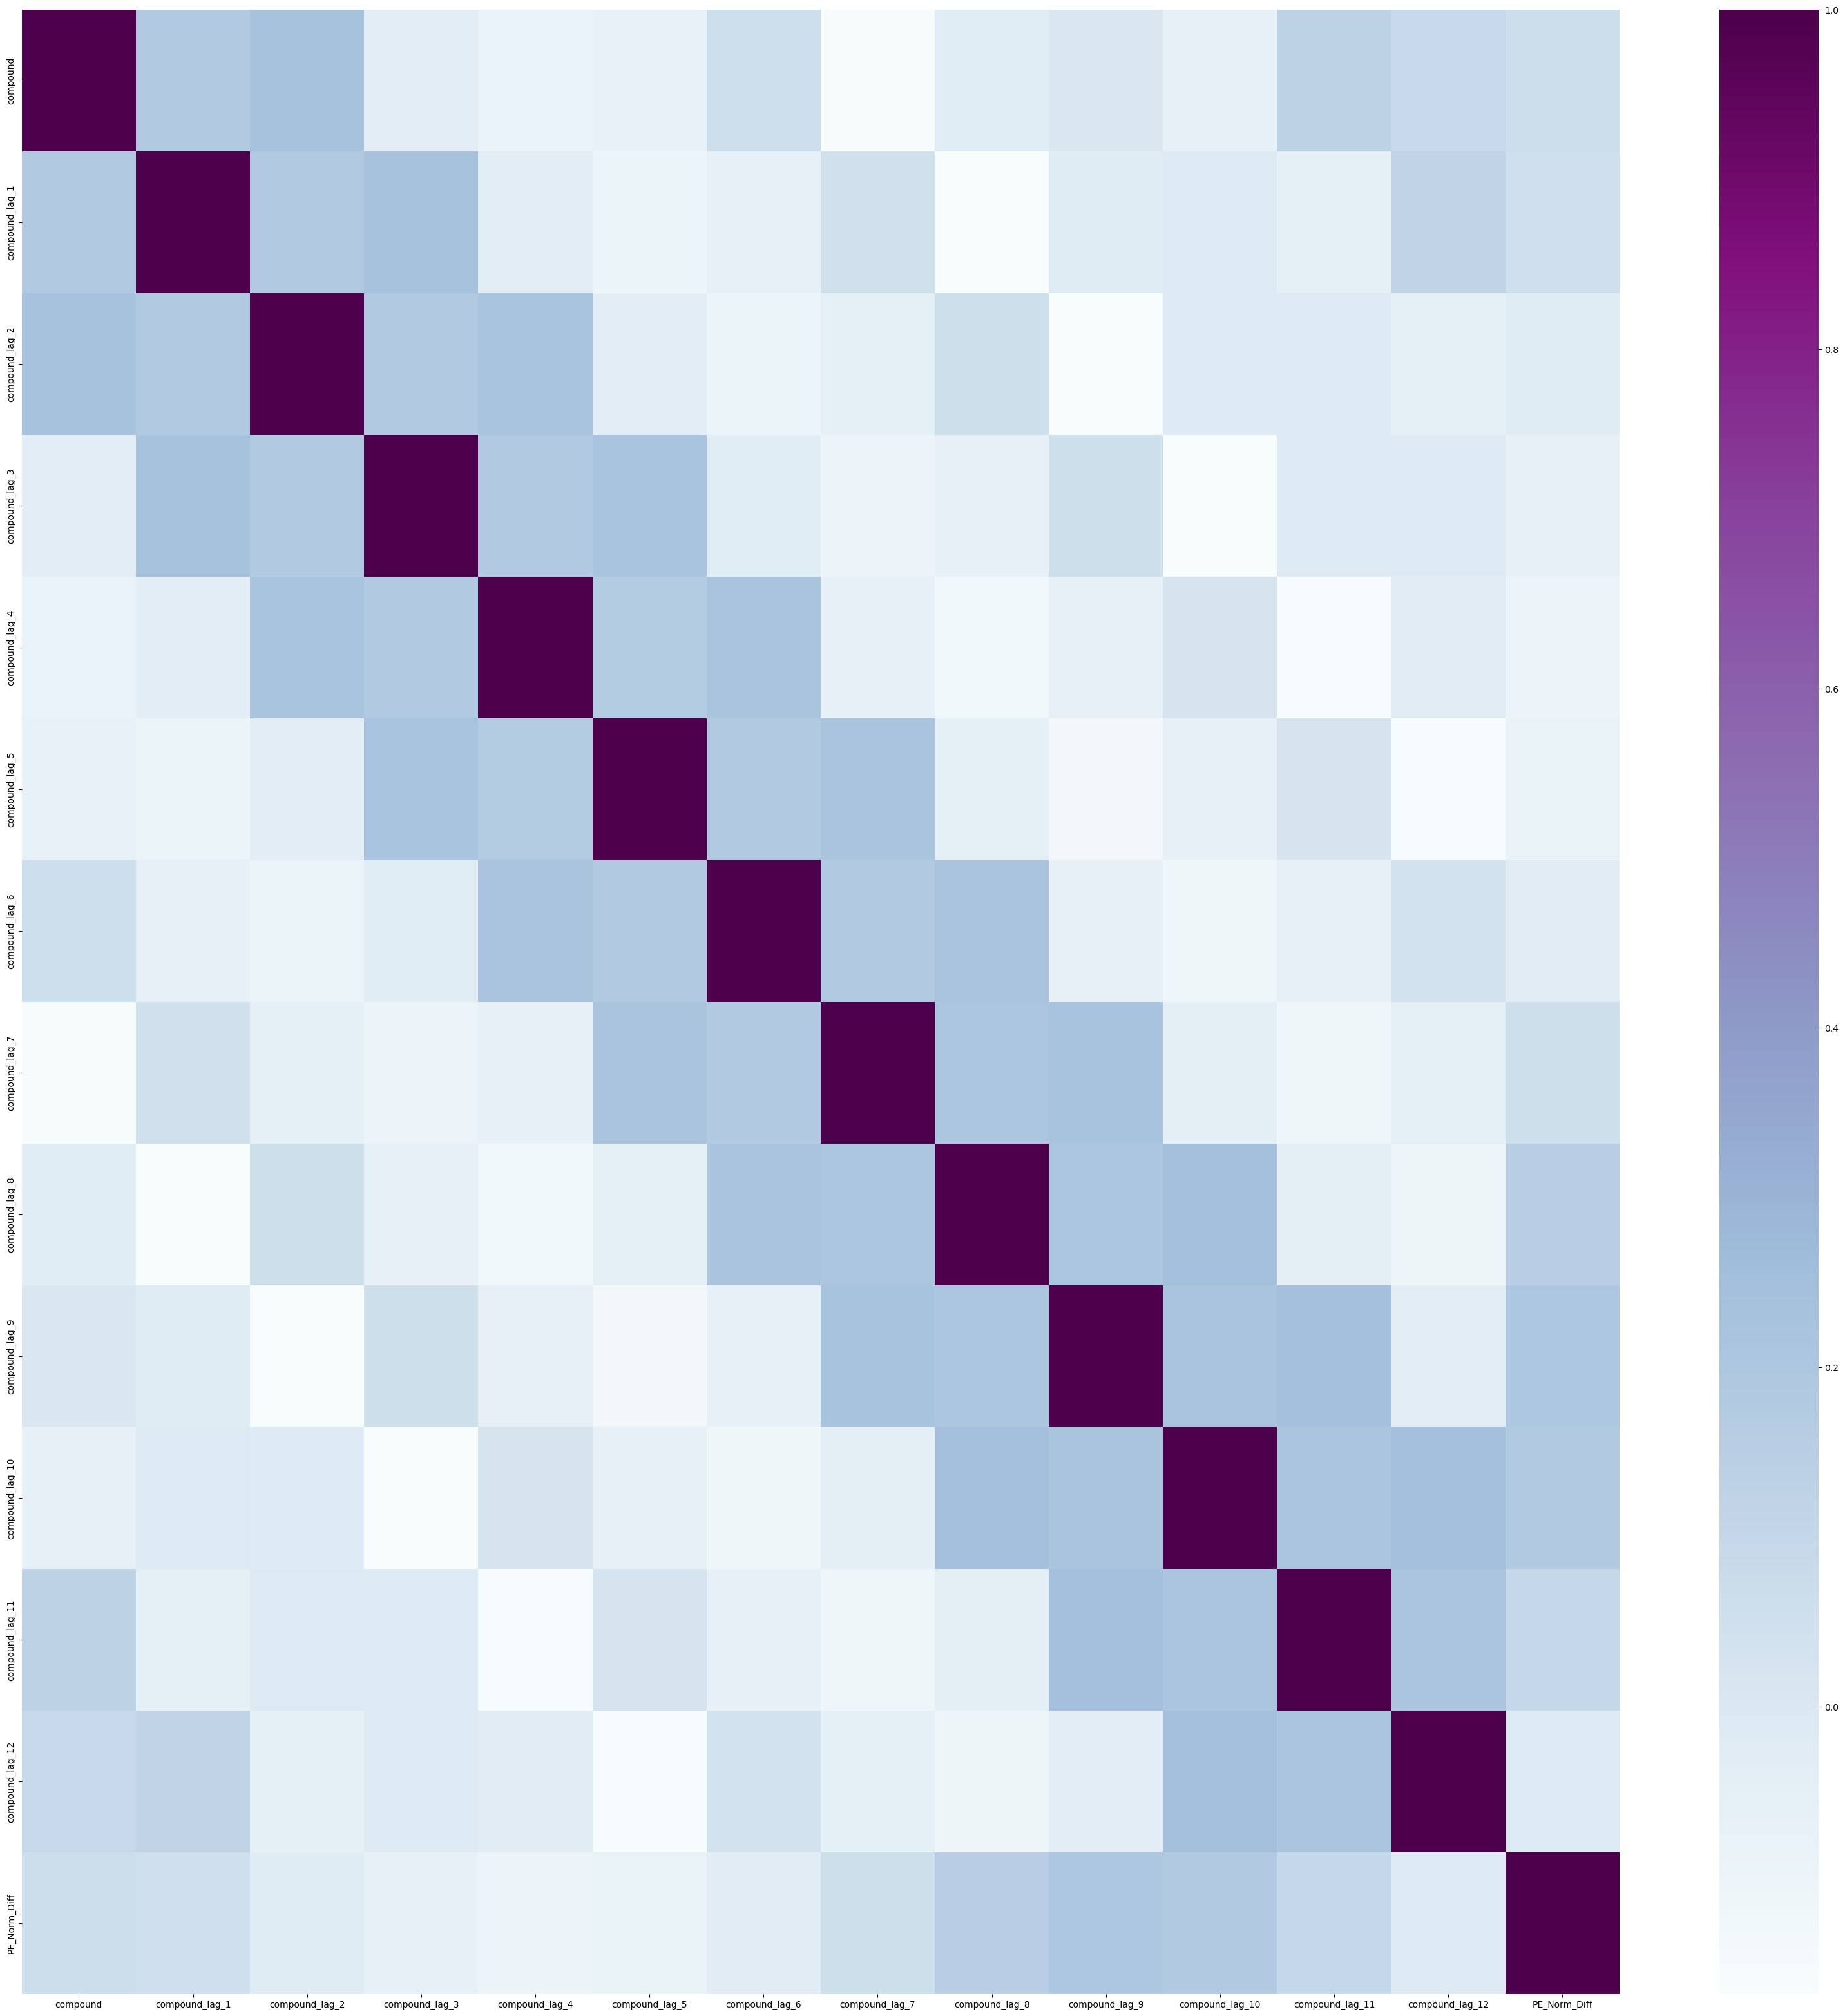

In [32]:
test_df = pd.DataFrame()


test_df['compound'] = BIIIIIIIIGDATASET['compound']
for i in range(1,13):
    test_df[f'compound_lag_{i}'] = BIIIIIIIIGDATASET[f'compound_lag_{i}']
test_df['PE_Norm_Diff'] = BIIIIIIIIGDATASET['PE_Norm_Diff']
fig, axes = plt.subplots(figsize=(40, 40))
heatmap_reduced_more = sns.heatmap(test_df.corr(), cmap='BuPu')
corr = test_df.corr()
# corr.idxmax(axis=1)
corr['PE_Norm_Diff'] = np.abs(corr['PE_Norm_Diff'])
corr.nlargest(2, 'PE_Norm_Diff')

## Interest rate

,Interest Rate Norm Diff2,Interest Rate Norm Diff2 lag 1,Interest Rate Norm Diff2 lag 2,Interest Rate Norm Diff2 lag 3,Interest Rate Norm Diff2 lag 4,Interest Rate Norm Diff2 lag 5,Interest Rate Norm Diff2 lag 6,Interest Rate Norm Diff2 lag 7,Interest Rate Norm Diff2 lag 8,Interest Rate Norm Diff2 lag 9,Interest Rate Norm Diff2 lag 10,Interest Rate Norm Diff2 lag 11,Interest Rate Norm Diff2 lag 12,PE_Norm_Diff
PE_Norm_Diff,-0.040622,-0.023731,0.011589,0.017909,0.024352,0.007932,-0.014439,-0.049828,-0.071485,-0.076371,-0.019157,0.064042,0.11447,1.00000
Interest Rate Norm Diff2 lag 12,0.183968,0.228166,-0.271422,-0.174983,0.243171,0.075902,-0.044357,-0.053544,-0.013675,0.000205,-0.308817,-0.188100,1.00000,0.11447


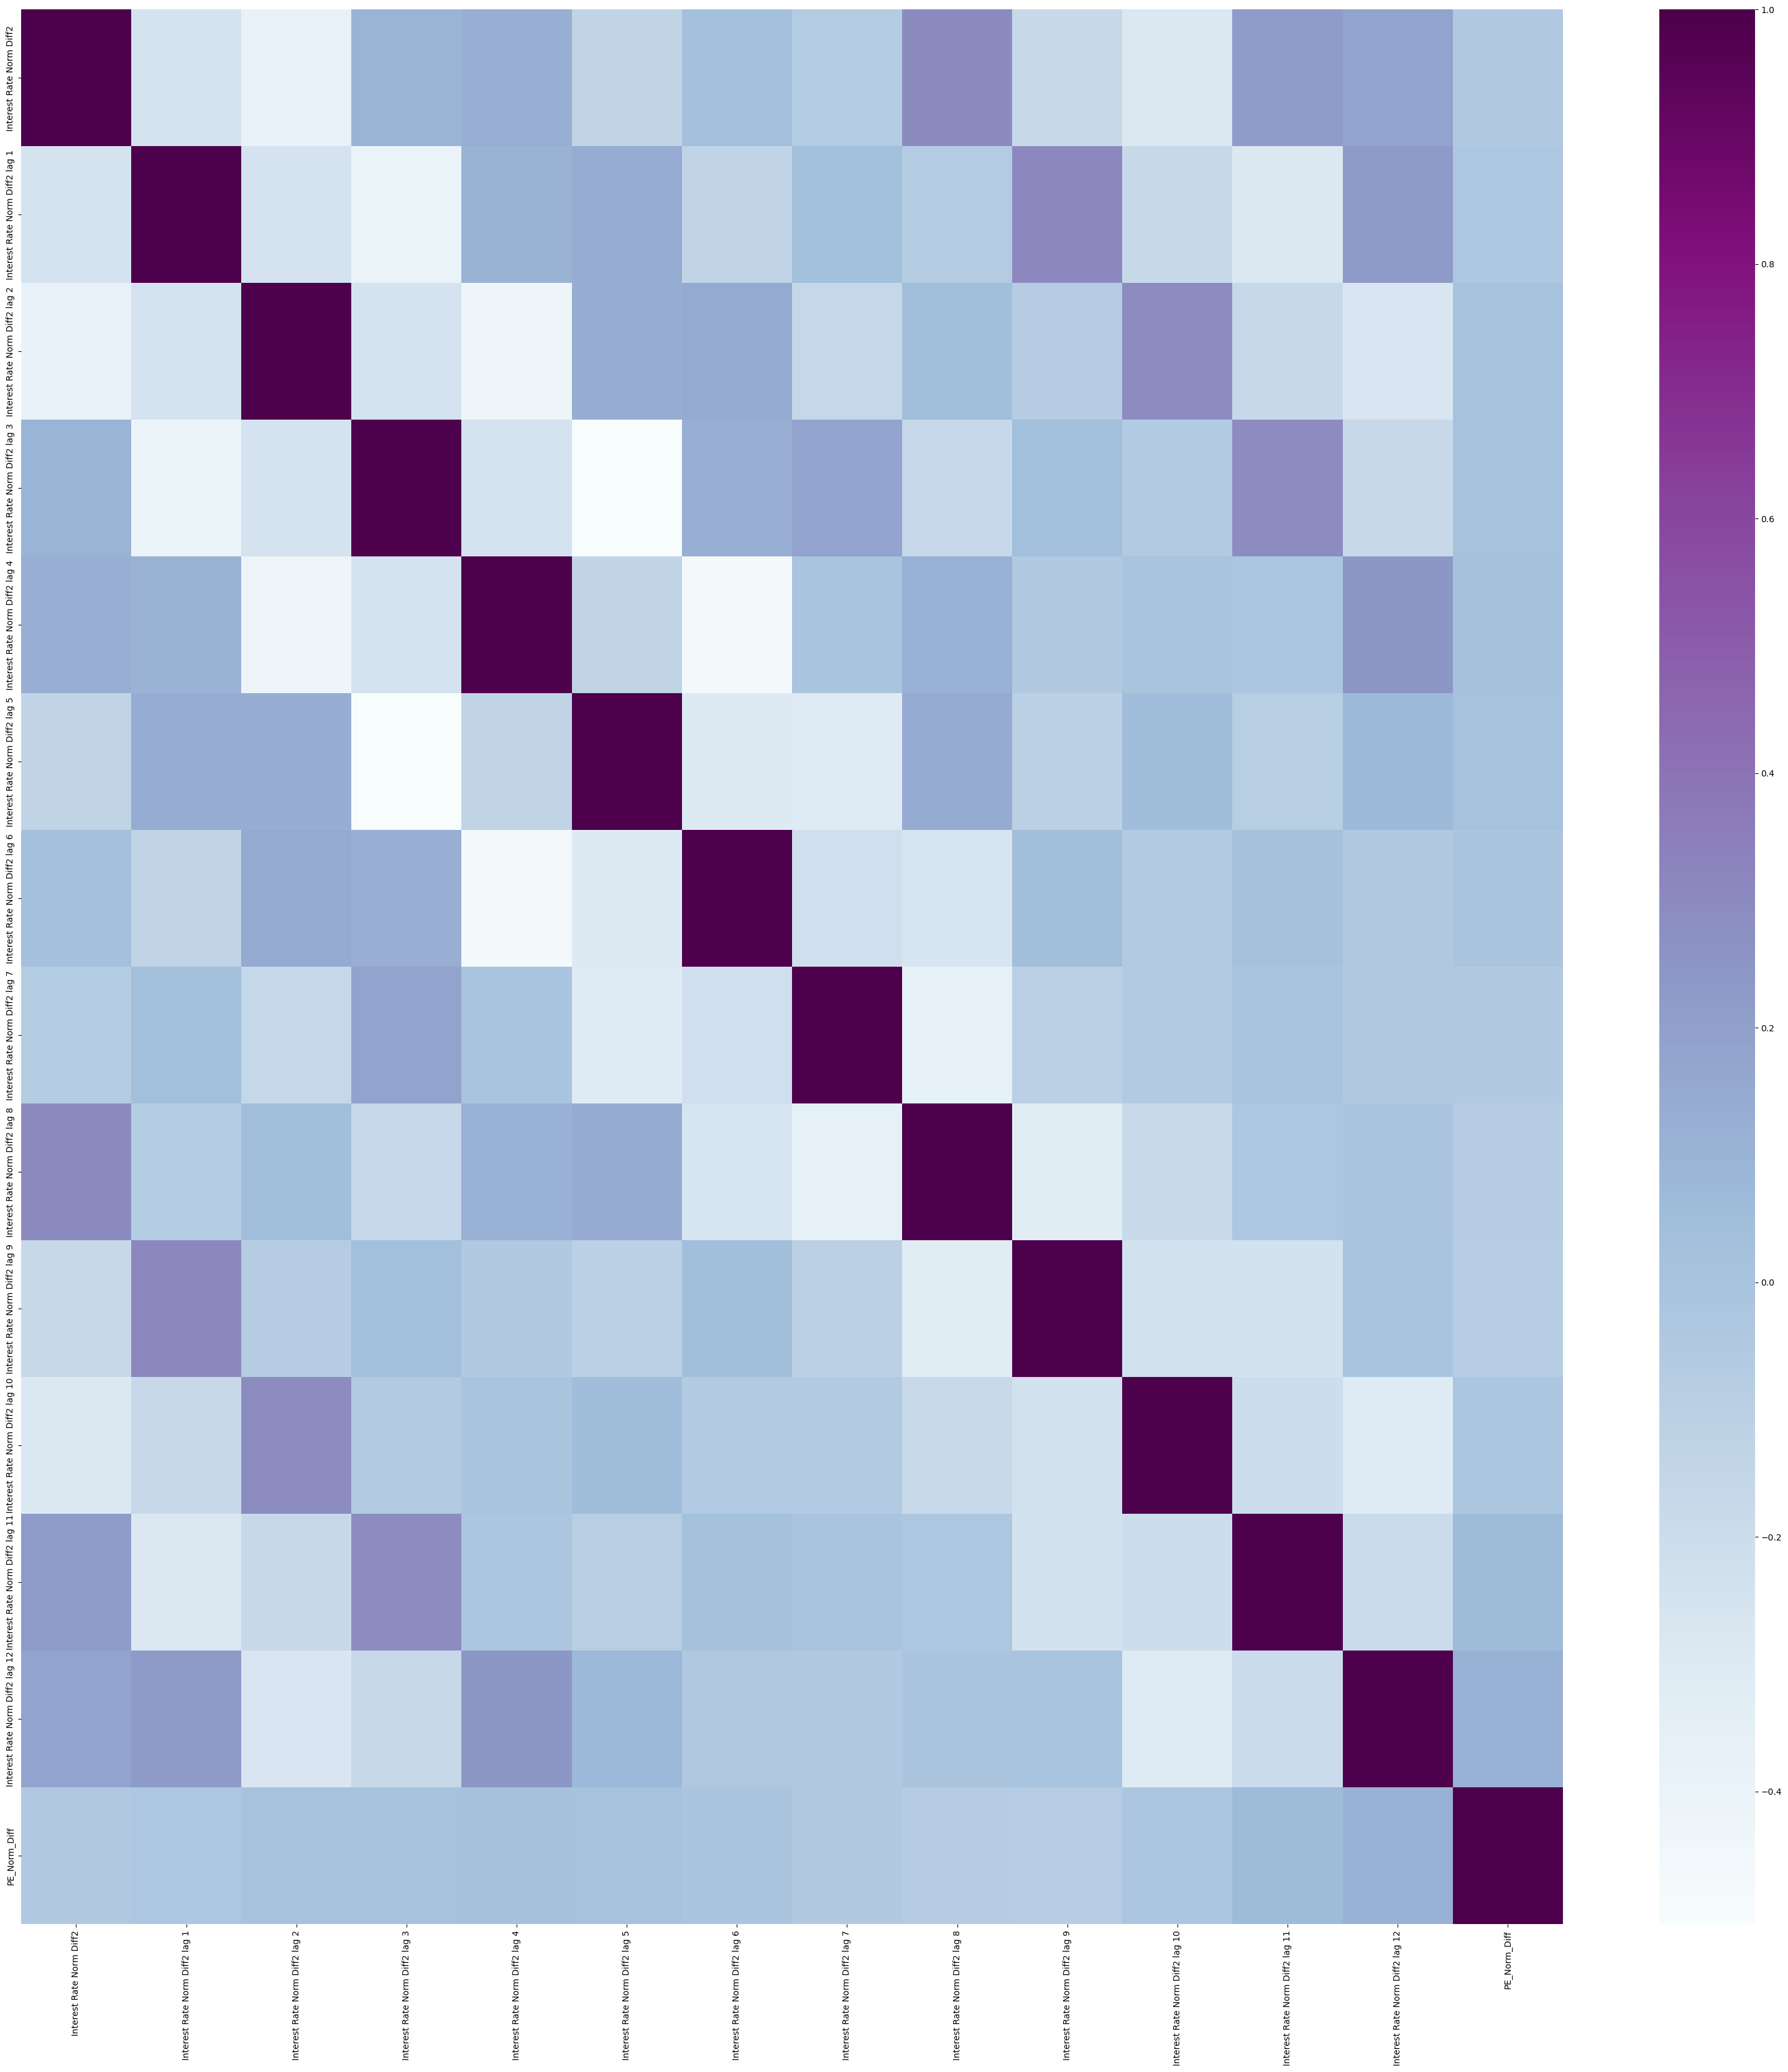

In [33]:
test_df = pd.DataFrame()


test_df['Interest Rate Norm Diff2'] = BIIIIIIIIGDATASET['Interest Rate Norm Diff2']
for i in range(1,13):
    test_df[f'Interest Rate Norm Diff2 lag {i}'] = BIIIIIIIIGDATASET[f'Interest Rate Norm Diff2 lag {i}']
test_df['PE_Norm_Diff'] = BIIIIIIIIGDATASET['PE_Norm_Diff']
fig, axes = plt.subplots(figsize=(40, 40))
heatmap_reduced_more = sns.heatmap(test_df.corr(), cmap='BuPu')
corr = test_df.corr()
# corr.idxmax(axis=1)
corr['PE_Norm_Diff'] = np.abs(corr['PE_Norm_Diff'])
corr.nlargest(2, 'PE_Norm_Diff')

## CPI

,CPI_Norm_Diff_2,CPI_Norm_Diff_2_lag_1,CPI_Norm_Diff_2_lag_2,CPI_Norm_Diff_2_lag_3,CPI_Norm_Diff_2_lag_4,CPI_Norm_Diff_2_lag_5,CPI_Norm_Diff_2_lag_6,CPI_Norm_Diff_2_lag_7,CPI_Norm_Diff_2_lag_8,CPI_Norm_Diff_2_lag_9,CPI_Norm_Diff_2_lag_10,CPI_Norm_Diff_2_lag_11,CPI_Norm_Diff_2_lag_12,PE_Norm_Diff
PE_Norm_Diff,-0.039447,-0.006096,-0.011882,0.024581,0.008045,0.007660,-0.000388,-0.021646,0.008895,-0.002307,-0.002531,-0.021729,-0.038567,1.000000
CPI_Norm_Diff_2,1.000000,-0.524369,0.153209,-0.276383,0.189731,-0.256097,0.493368,-0.300082,0.202901,-0.354470,0.186438,-0.203212,0.527445,0.039447


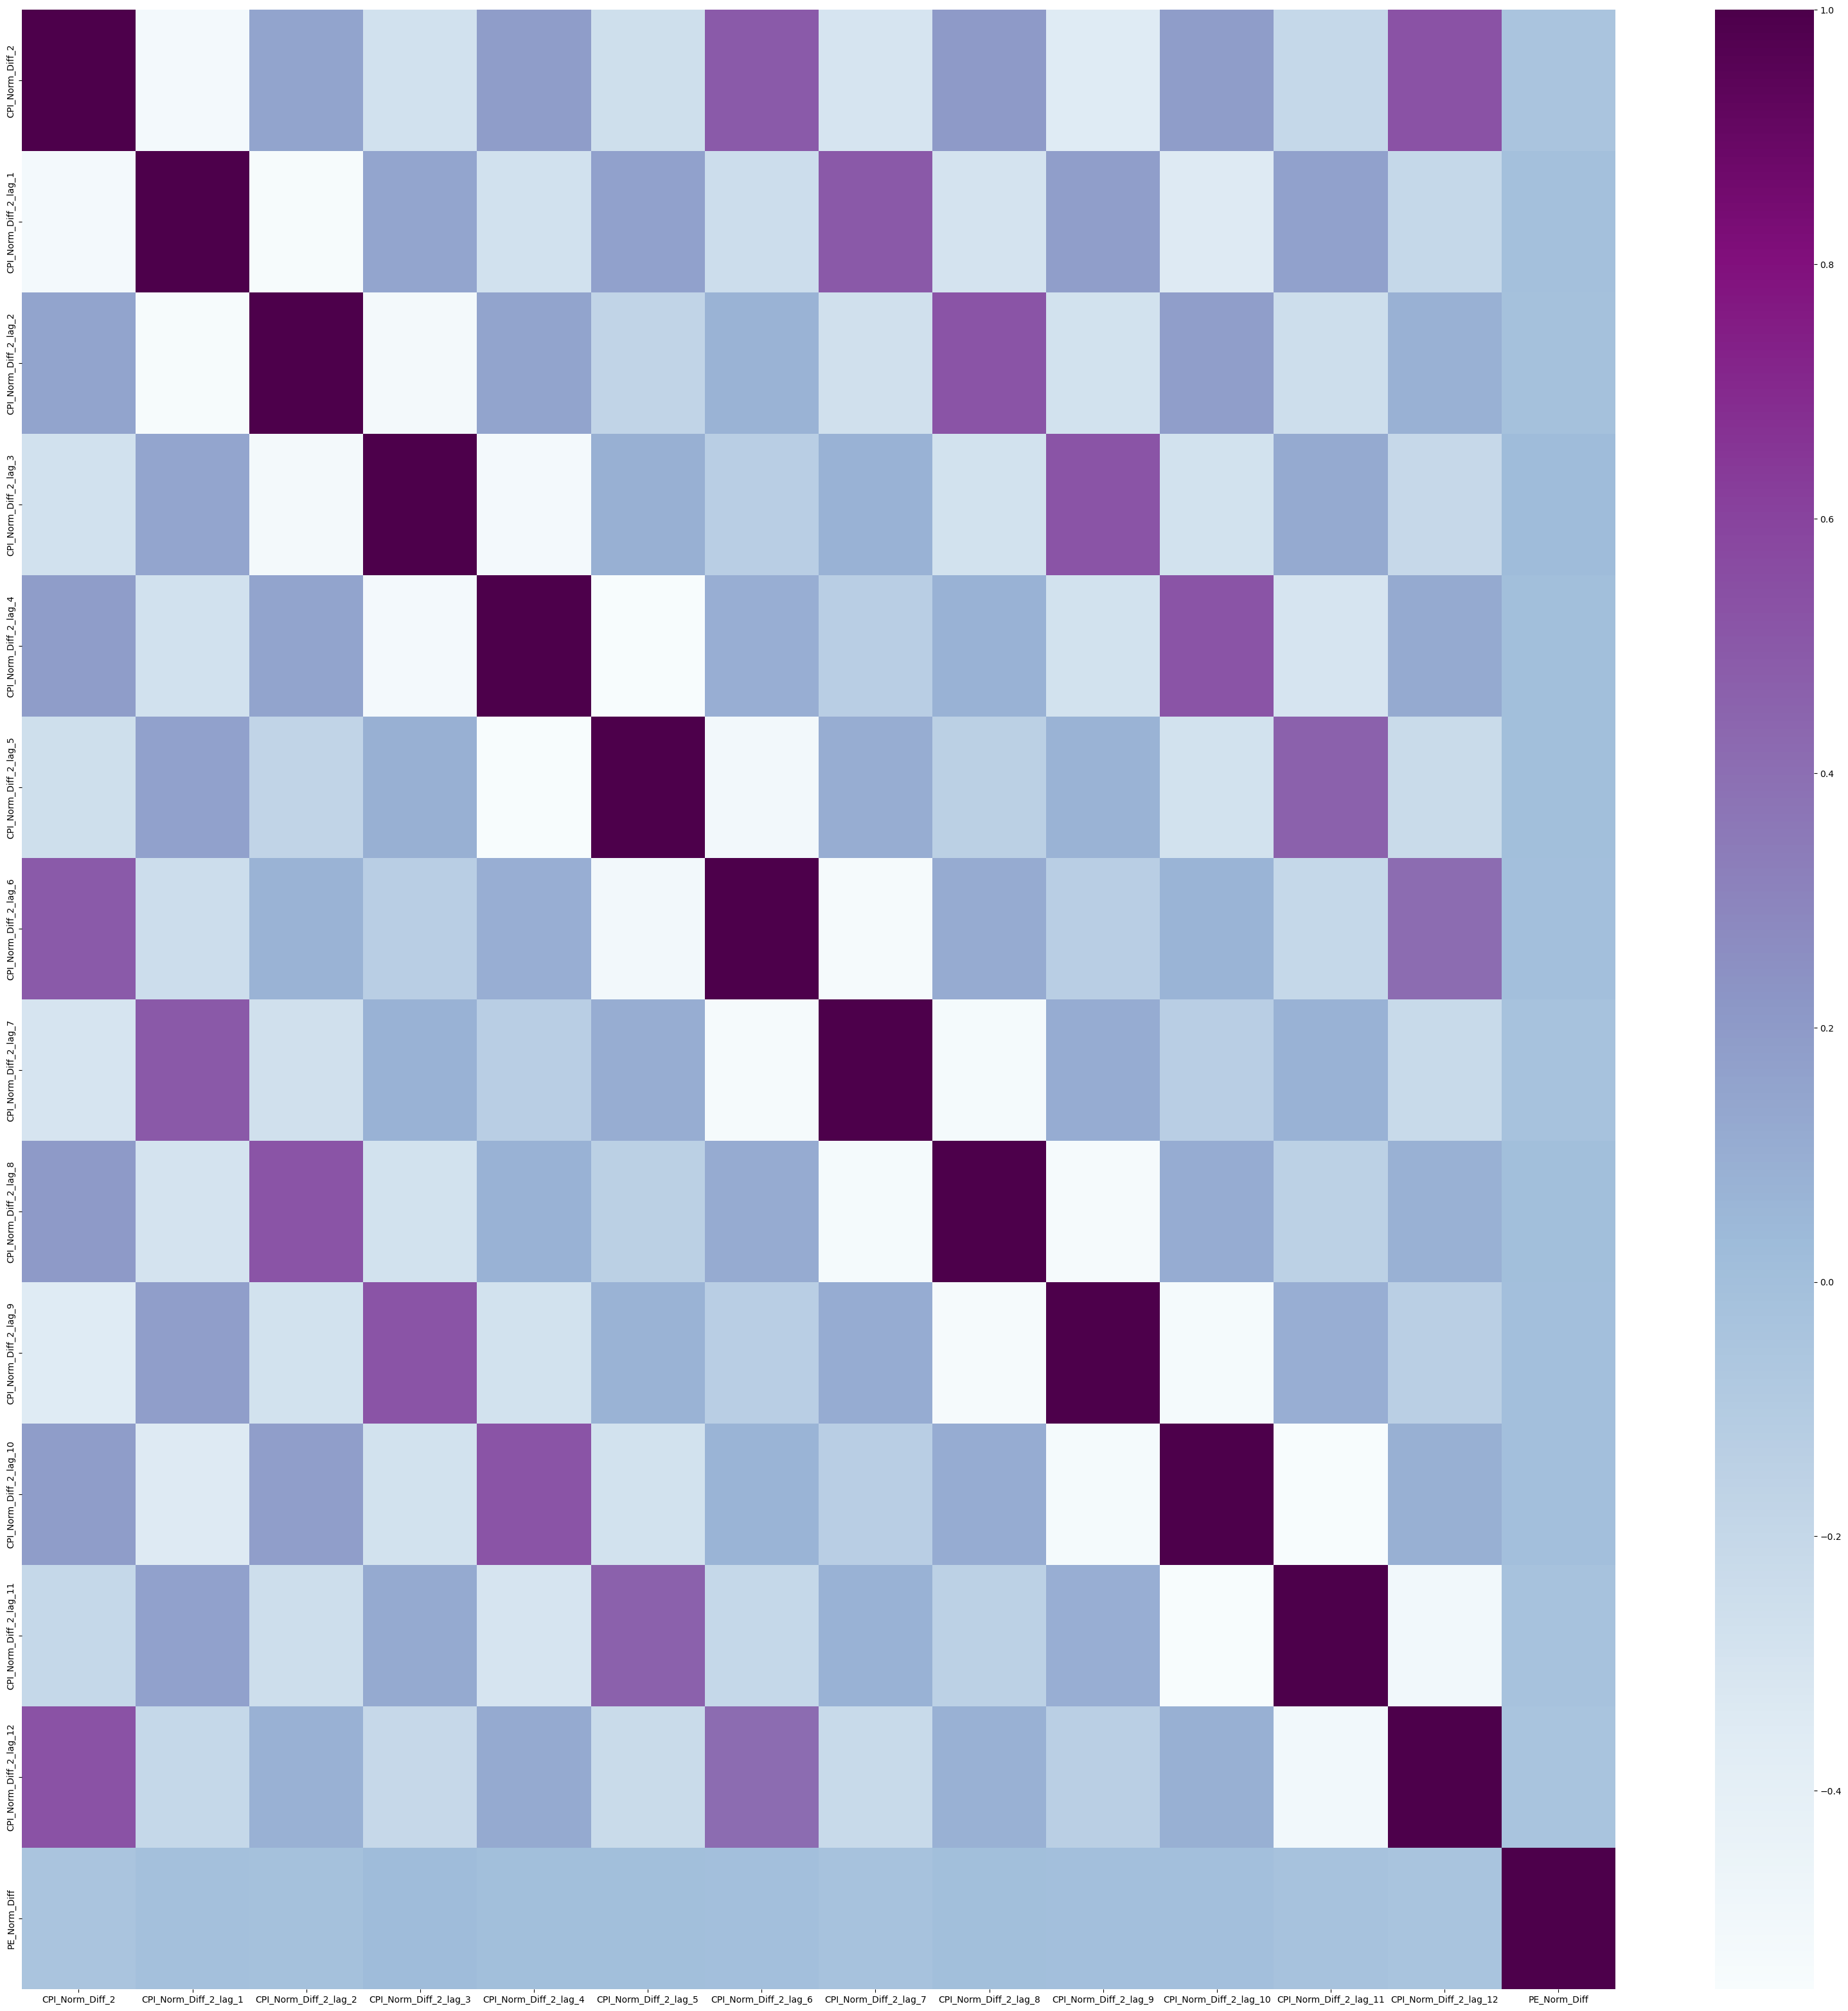

In [34]:
test_df = pd.DataFrame()


test_df['CPI_Norm_Diff_2'] = BIIIIIIIIGDATASET['CPI_Norm_Diff_2']
for i in range(1,13):
    test_df[f'CPI_Norm_Diff_2_lag_{i}'] = BIIIIIIIIGDATASET[f'CPI_Norm_Diff_2_lag_{i}']
test_df['PE_Norm_Diff'] = BIIIIIIIIGDATASET['PE_Norm_Diff']
fig, axes = plt.subplots(figsize=(40, 40))
heatmap_reduced_more = sns.heatmap(test_df.corr(), cmap='BuPu')
corr = test_df.corr()
# corr.idxmax(axis=1)
corr['PE_Norm_Diff'] = np.abs(corr['PE_Norm_Diff'])
corr.nlargest(2, 'PE_Norm_Diff')

## CPIH

,CPIH_Norm_Diff_2,CPIH_Norm_Diff_2_lag_1,CPIH_Norm_Diff_2_lag_2,CPIH_Norm_Diff_2_lag_3,CPIH_Norm_Diff_2_lag_4,CPIH_Norm_Diff_2_lag_5,CPIH_Norm_Diff_2_lag_6,CPIH_Norm_Diff_2_lag_7,CPIH_Norm_Diff_2_lag_8,CPIH_Norm_Diff_2_lag_9,CPIH_Norm_Diff_2_lag_10,CPIH_Norm_Diff_2_lag_11,CPIH_Norm_Diff_2_lag_12,PE_Norm_Diff
PE_Norm_Diff,-0.040057,-0.010699,-0.019900,0.013322,0.008607,0.011591,0.011479,-0.014959,0.006064,-0.007406,-0.008610,-0.019199,-0.032798,1.000000
CPIH_Norm_Diff_2,1.000000,-0.536943,0.177863,-0.298749,0.225550,-0.286847,0.481396,-0.289599,0.243803,-0.408778,0.221954,-0.231292,0.555239,0.040057


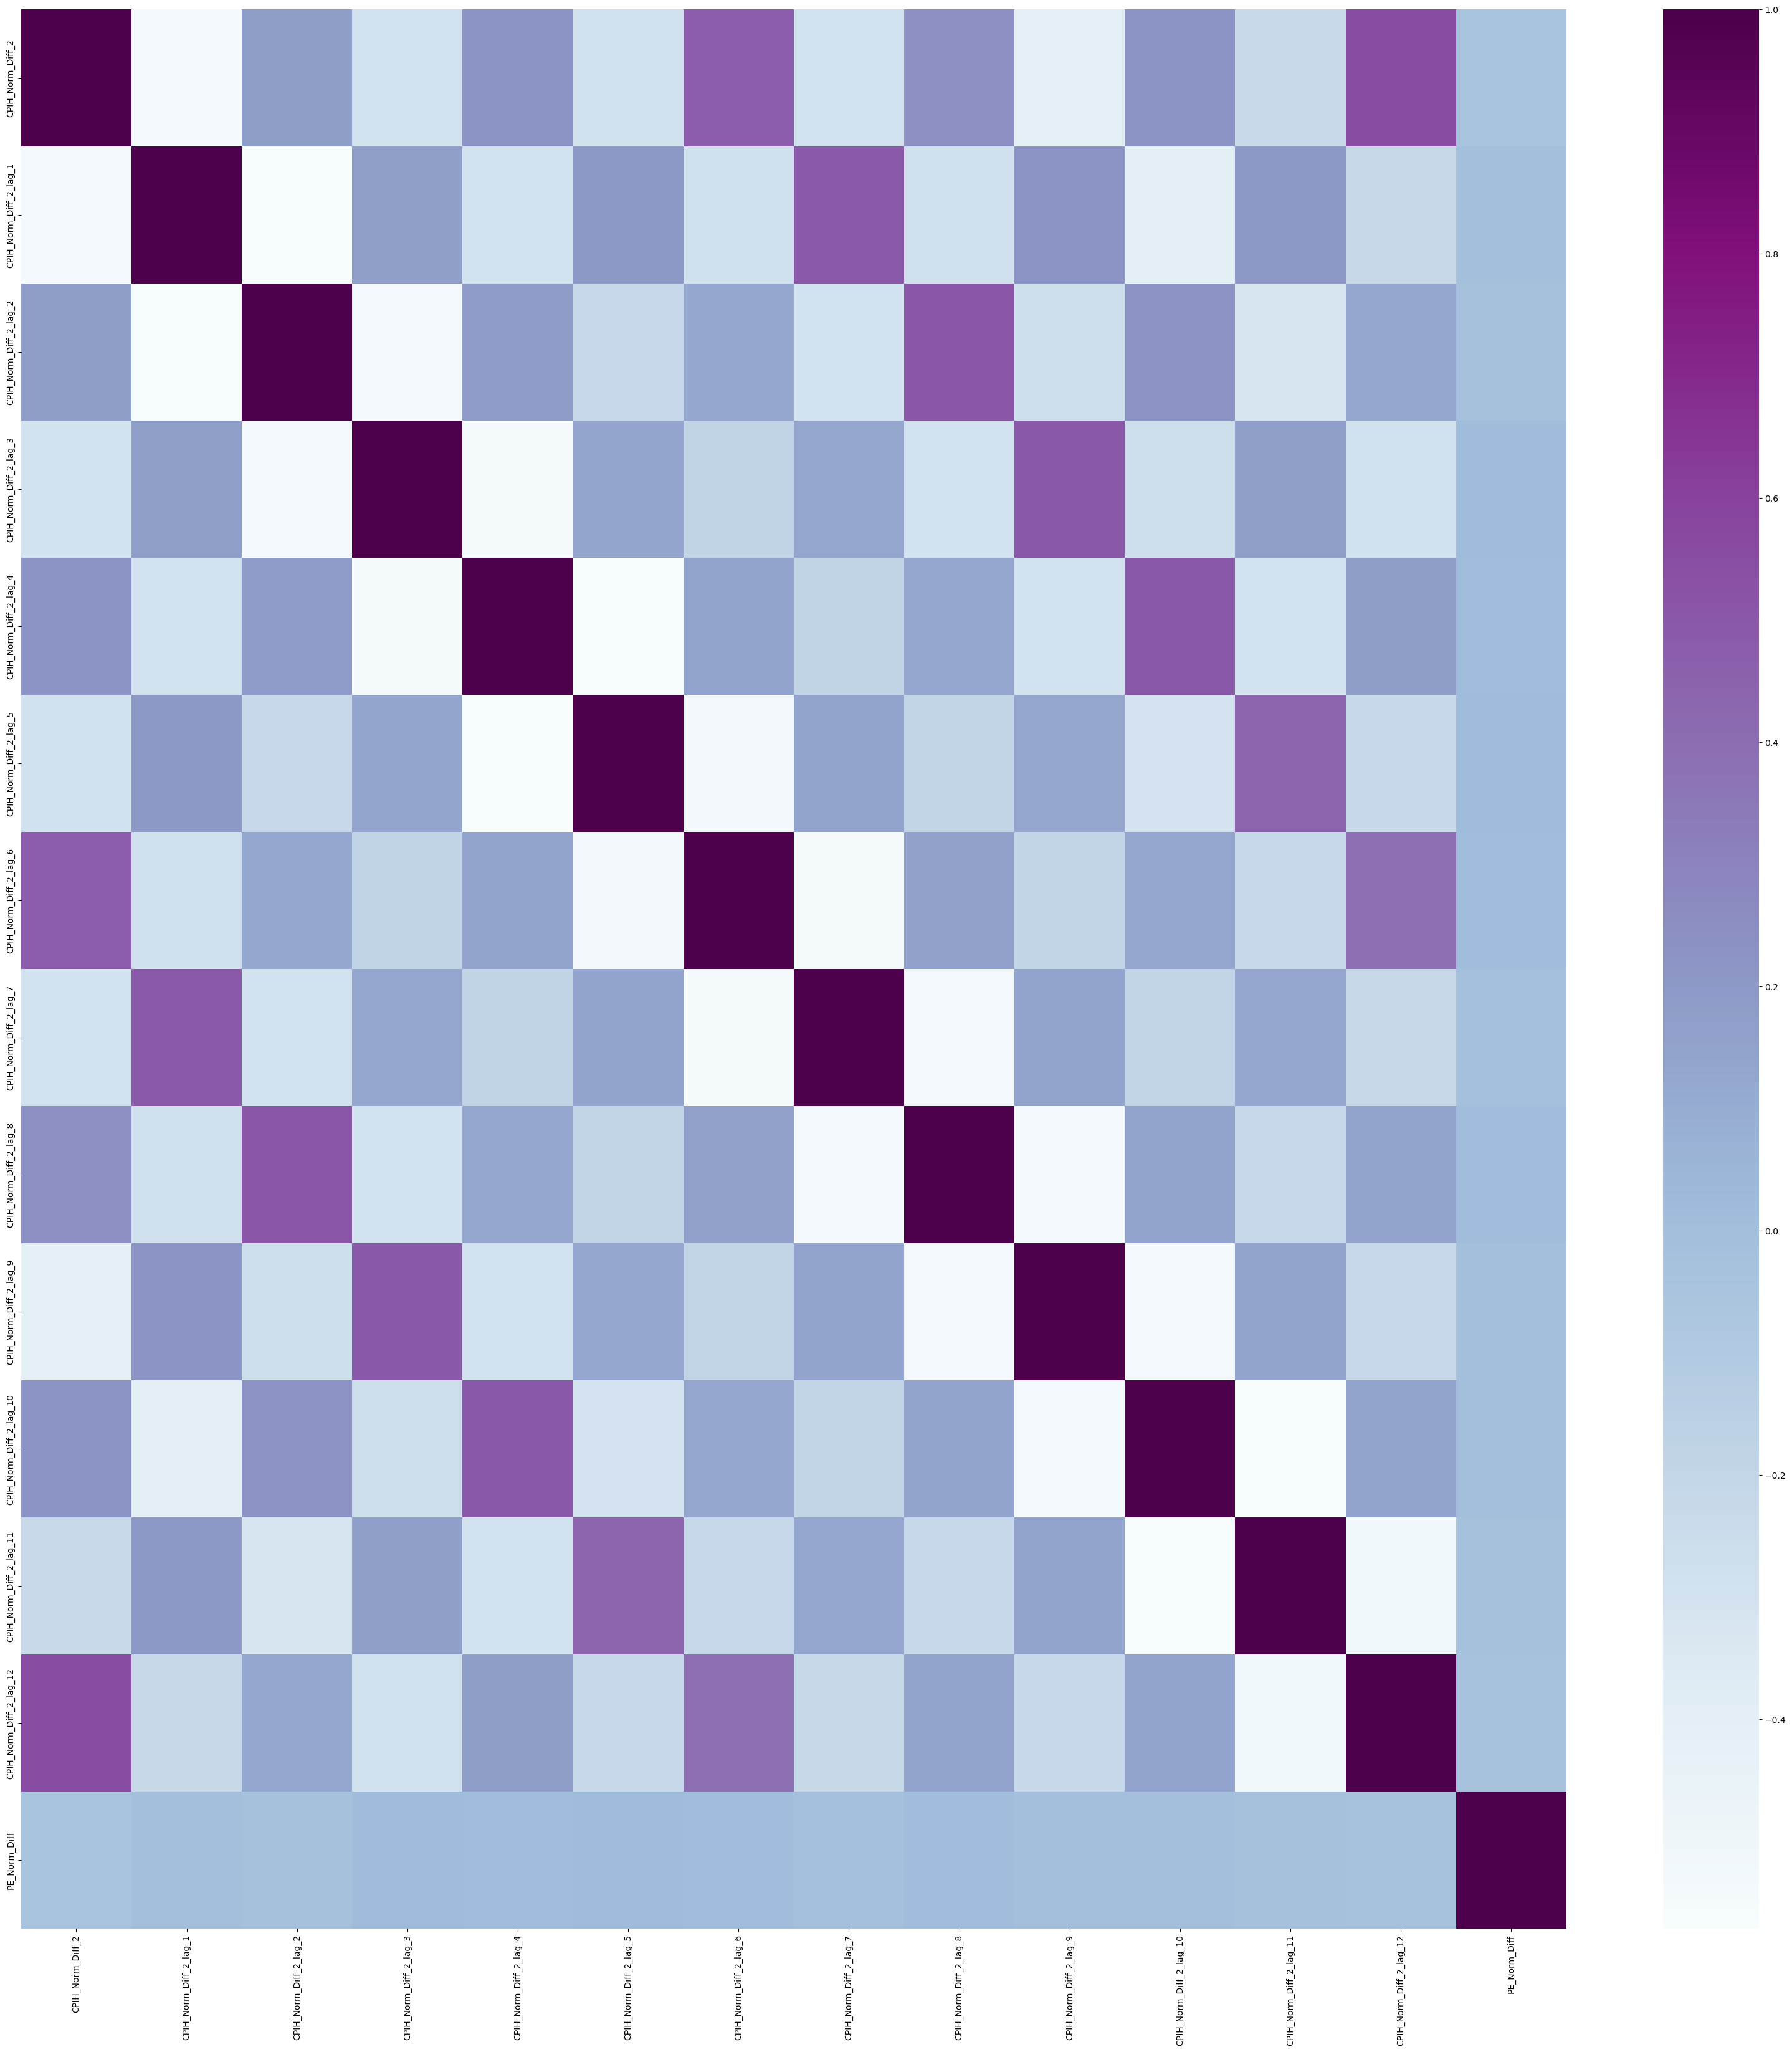

In [35]:
test_df = pd.DataFrame()

test_df['CPIH_Norm_Diff_2'] = BIIIIIIIIGDATASET['CPIH_Norm_Diff_2']
for i in range(1,13):
    test_df[f'CPIH_Norm_Diff_2_lag_{i}'] = BIIIIIIIIGDATASET[f'CPIH_Norm_Diff_2_lag_{i}']
test_df['PE_Norm_Diff'] = BIIIIIIIIGDATASET['PE_Norm_Diff']
fig, axes = plt.subplots(figsize=(40, 40))
heatmap_reduced_more = sns.heatmap(test_df.corr(), cmap='BuPu')
corr = test_df.corr()
# corr.idxmax(axis=1)
corr['PE_Norm_Diff'] = np.abs(corr['PE_Norm_Diff'])
corr.nlargest(2, 'PE_Norm_Diff')

## Productivity

,Productivity_Norm_Diff,Productivity_Norm_Diff_lag_1,Productivity_Norm_Diff_lag_2,Productivity_Norm_Diff_lag_3,Productivity_Norm_Diff_lag_4,Productivity_Norm_Diff_lag_5,Productivity_Norm_Diff_lag_6,Productivity_Norm_Diff_lag_7,Productivity_Norm_Diff_lag_8,Productivity_Norm_Diff_lag_9,Productivity_Norm_Diff_lag_10,Productivity_Norm_Diff_lag_11,Productivity_Norm_Diff_lag_12,PE_Norm_Diff
PE_Norm_Diff,-0.190746,0.056294,0.325292,0.51605,0.299394,-0.072695,-0.43240,-0.471627,-0.247069,-0.003206,0.164526,0.143940,0.111170,1.00000
Productivity_Norm_Diff_lag_3,-0.607961,-0.004114,-0.005590,1.00000,-0.005860,-0.002812,-0.61274,-0.003727,-0.003044,0.076058,-0.003508,-0.003098,0.129458,0.51605


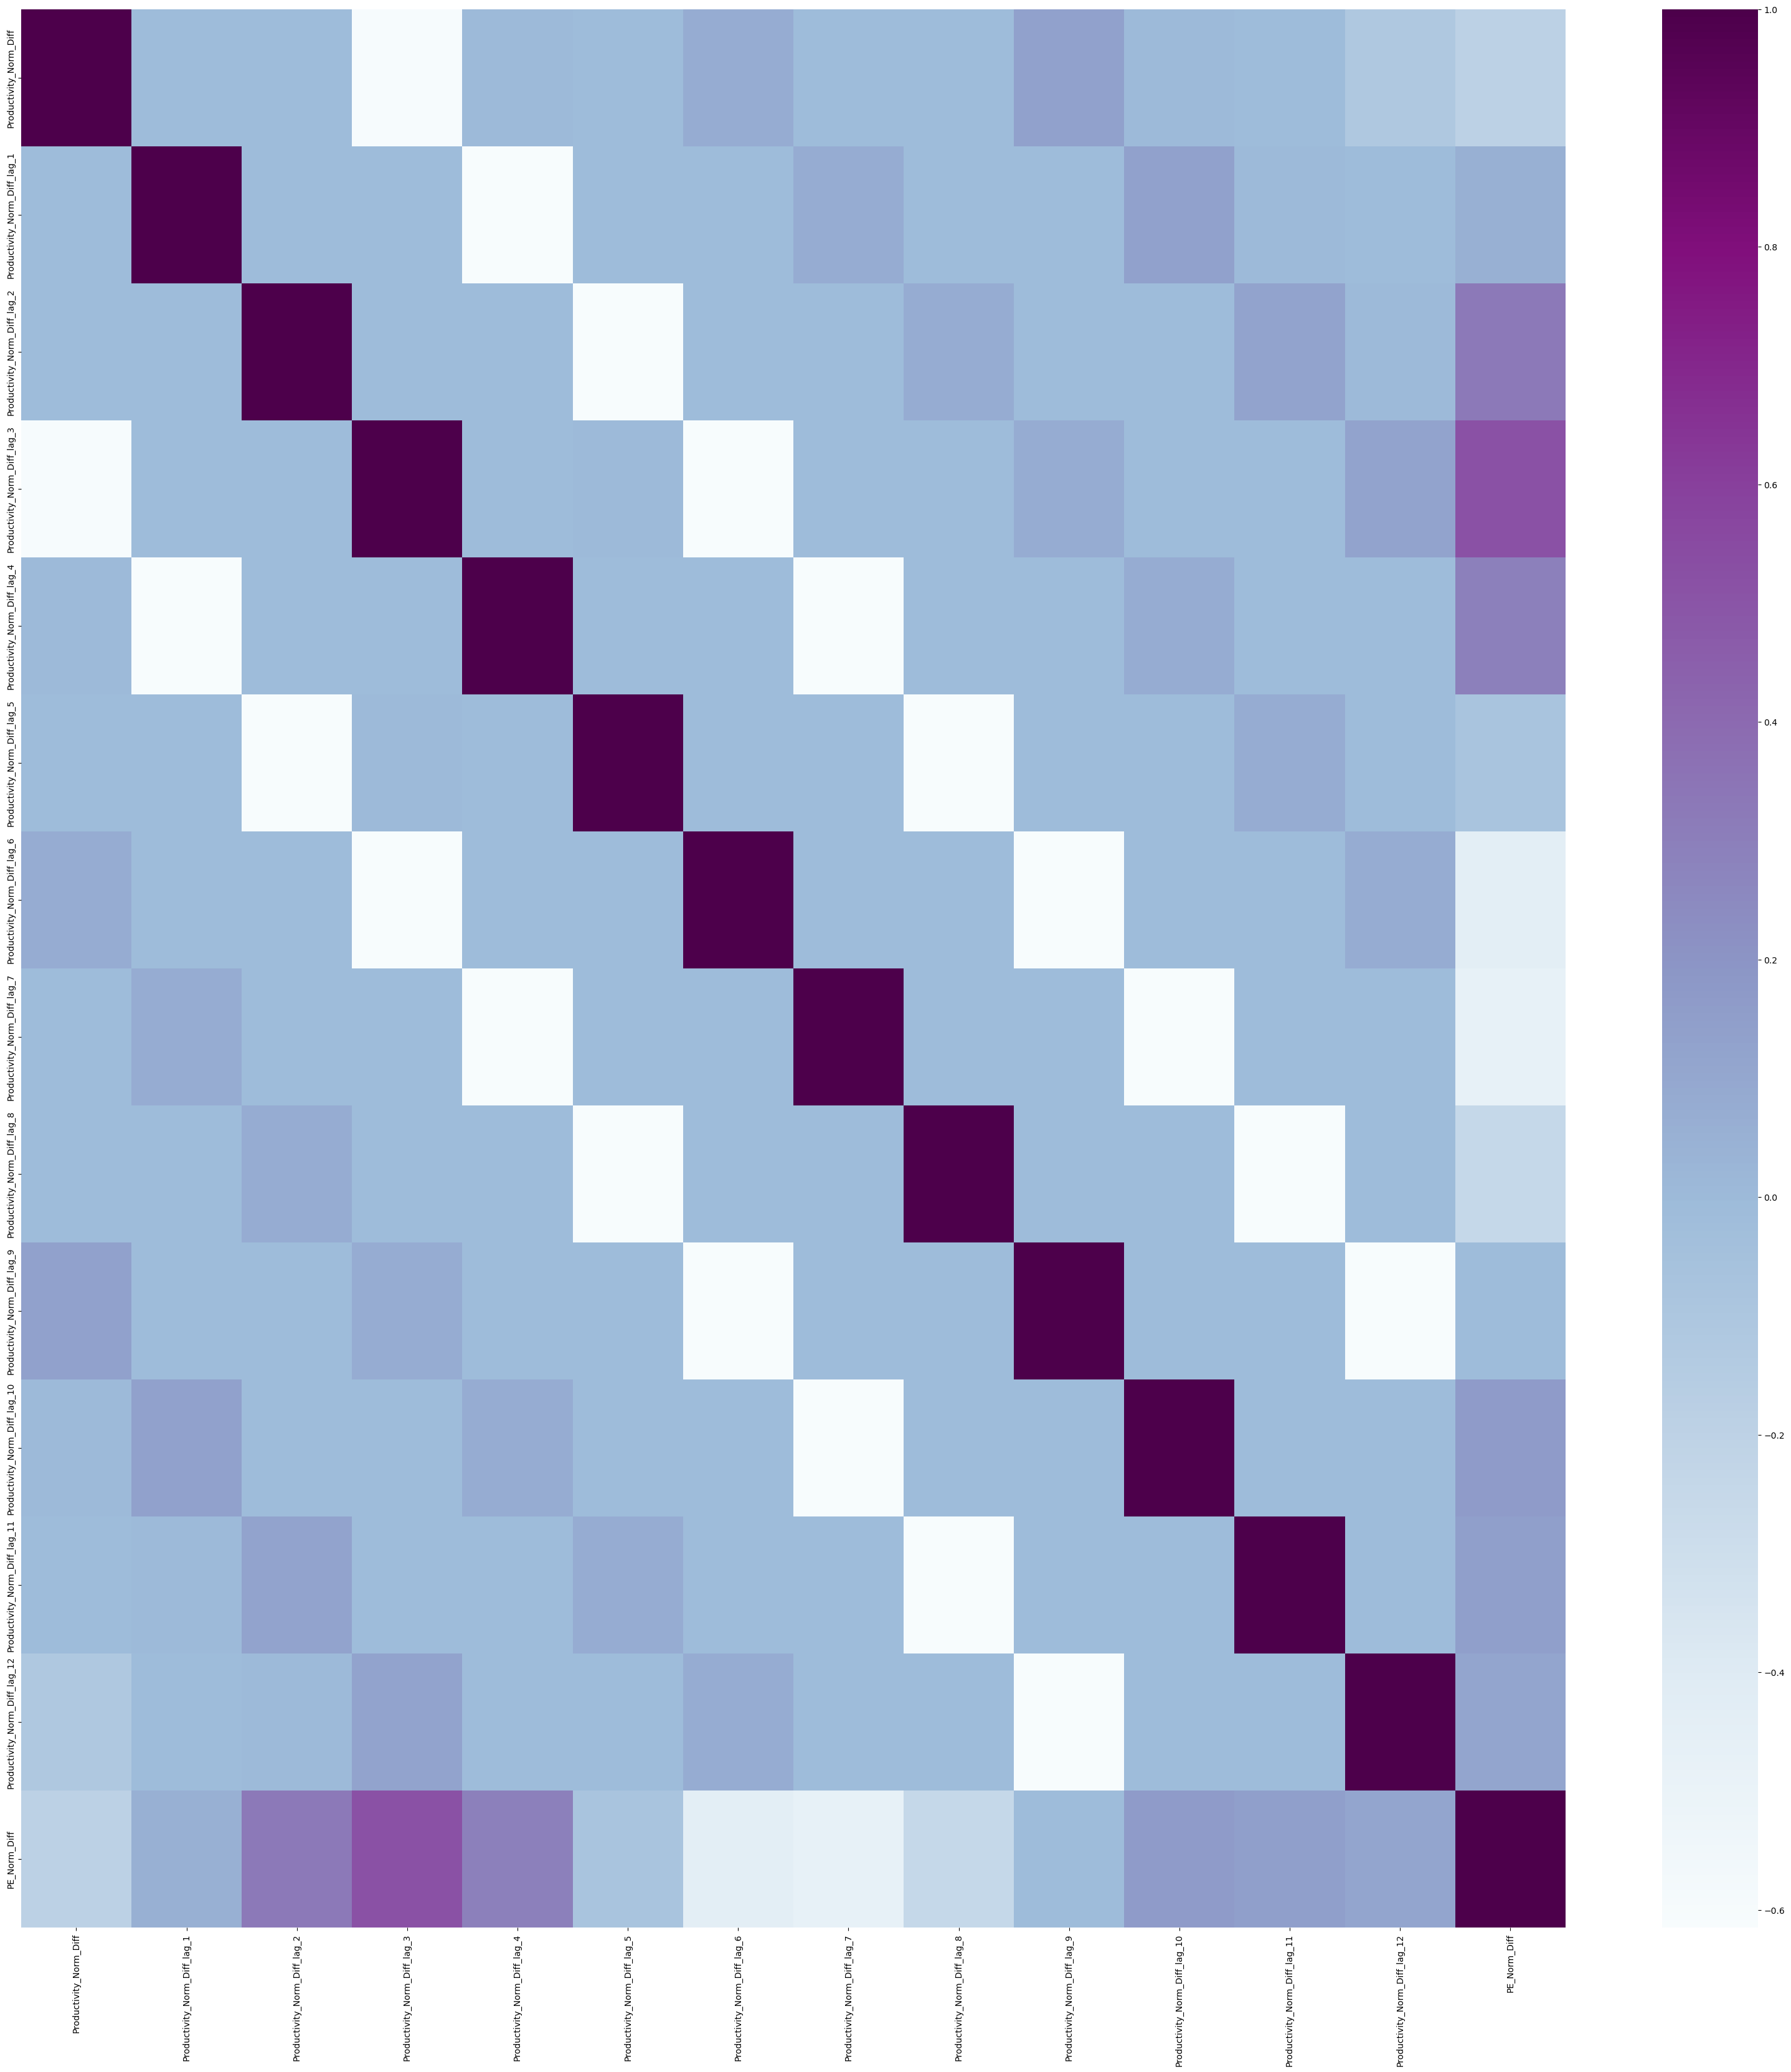

In [36]:
test_df = pd.DataFrame()


test_df['Productivity_Norm_Diff'] = BIIIIIIIIGDATASET['Productivity_Norm_Diff']
for i in range(1,13):
    test_df[f'Productivity_Norm_Diff_lag_{i}'] = BIIIIIIIIGDATASET[f'Productivity_Norm_Diff_lag_{i}']
test_df['PE_Norm_Diff'] = BIIIIIIIIGDATASET['PE_Norm_Diff']
fig, axes = plt.subplots(figsize=(40, 40))
heatmap_reduced_more = sns.heatmap(test_df.corr(), cmap='BuPu')
corr = test_df.corr()
# corr.idxmax(axis=1)
corr['PE_Norm_Diff'] = np.abs(corr['PE_Norm_Diff'])
corr.nlargest(2, 'PE_Norm_Diff')